In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data.csv
df1 = pd.read_csv("data.csv")

In [3]:
# Loading washdash.csv
df2 = pd.read_csv("washdash.csv")

In [4]:
df1.head()

Location  Period  ...        Dim1 First Tooltip
0  Afghanistan    2016  ...  Both sexes         13.92
1  Afghanistan    2016  ...        Male         12.61
2  Afghanistan    2016  ...      Female         15.31
3      Albania    2016  ...  Both sexes          0.17
4      Albania    2016  ...        Male          0.21

[5 rows x 5 columns]

In [5]:
df1.shape

(549, 5)

In [6]:
# Checking null values in data.csv
df1.isnull().sum()

Location         0
Period           0
Indicator        0
Dim1             0
First Tooltip    0
dtype: int64

In [7]:
df2.head()

ISO3 Country Residence Type  ...  Coverage   Population    Service level
0  ABW   Aruba          total  ...  97.73766  99157.79158   At least basic
1  ABW   Aruba          total  ...  97.02397  98433.72740   At least basic
2  ABW   Aruba          total  ...   0.00000      0.00000  Limited service
3  ABW   Aruba          total  ...   0.00000      0.00000  Limited service
4  ABW   Aruba          total  ...   1.36734   1387.20688  Open defecation

[5 rows x 8 columns]

In [8]:
df2.shape

(34052, 8)

In [9]:
# Checking null values in washdash.csv
df2.isnull().sum()

ISO3              0
Country           0
Residence Type    0
Service Type      0
Year              0
Coverage          0
Population        0
Service level     0
dtype: int64

In [10]:
df2.shape

(34052, 8)

In [11]:
# Renaming columns in data.csv
df1.rename(columns={'Location':'Country',
                    'Period':'Year',
                    'Dim1':'Sex',
                    'First Tooltip':'Mortality Rate'}, 
                 inplace=True)

In [12]:
df1.head()

Country  Year  ...         Sex Mortality Rate
0  Afghanistan  2016  ...  Both sexes          13.92
1  Afghanistan  2016  ...        Male          12.61
2  Afghanistan  2016  ...      Female          15.31
3      Albania  2016  ...  Both sexes           0.17
4      Albania  2016  ...        Male           0.21

[5 rows x 5 columns]

In [13]:
df1 = df1.drop(columns=['Year'])

In [14]:
df1.head()

Country  ... Mortality Rate
0  Afghanistan  ...          13.92
1  Afghanistan  ...          12.61
2  Afghanistan  ...          15.31
3      Albania  ...           0.17
4      Albania  ...           0.21

[5 rows x 4 columns]

In [15]:
df1.shape

(549, 4)

In [16]:
# Merging data.csv and washdash.csv based upon country column
df = pd.merge(df1, df2, on=["Country"])

In [17]:
df.head()

Country  ...   Service level
0  Afghanistan  ...  At least basic
1  Afghanistan  ...  At least basic
2  Afghanistan  ...  At least basic
3  Afghanistan  ...  At least basic
4  Afghanistan  ...  At least basic

[5 rows x 11 columns]

In [18]:
df.tail()

Country  ... Service level
90535  Zimbabwe  ...    Unimproved
90536  Zimbabwe  ...    Unimproved
90537  Zimbabwe  ...    Unimproved
90538  Zimbabwe  ...    Unimproved
90539  Zimbabwe  ...    Unimproved

[5 rows x 11 columns]

In [19]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatema

In [20]:
df['Service level'].unique()

array(['At least basic', 'Basic service', 'Limited service',
       'No handwashing facility', 'Open defecation', 'Surface water',
       'Unimproved', 'Safely managed service'], dtype=object)

In [21]:
df['Service Type'].unique()

array(['Sanitation', 'Drinking water', 'Hygiene'], dtype=object)

In [22]:
df['Residence Type'].unique()

array(['total', 'rural', 'urban'], dtype=object)

In [23]:
df['Year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014])

In [24]:
df['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [25]:
df.to_csv("/content/WASH.csv")

In [26]:
# Loading libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [27]:
# Making a copy of df dataframe 
df_copy = df.copy()

In [28]:
df_copy.head()

Country  ...   Service level
0  Afghanistan  ...  At least basic
1  Afghanistan  ...  At least basic
2  Afghanistan  ...  At least basic
3  Afghanistan  ...  At least basic
4  Afghanistan  ...  At least basic

[5 rows x 11 columns]

In [29]:
df_copy.shape 

(90540, 11)

In [30]:
# Dropping unwanted columns 
df_copy = df_copy.drop(columns=['Indicator', 'ISO3'])

In [31]:
df_copy['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [32]:
df_copy['Residence Type'].unique()

array(['total', 'rural', 'urban'], dtype=object)

In [33]:
df_copy['Service Type'] = df_copy['Service Type'].map({'Sanitation':1, 'Drinking water':2, 'Hygiene' : 3})

In [34]:
df_copy['Residence Type'] = df_copy['Residence Type'].map({'total':1, 'rural':2, 'urban' : 3})

In [35]:
df_copy['Sex'] = df_copy['Sex'].map({'Male':1, 'Female':2, 'Both sexes' : 3})

In [36]:
df_copy['Service level'] = df_copy['Service level'].map({'At least basic':1, 'Basic service':2, 'Limited service':3, 'No handwashing facility':4, 'Open defecation':5, 'Surface water':6, 'Unimproved':7, 'Safely managed service':8})

In [37]:
df_copy['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatema

In [38]:
df_copy['Country'] = df_copy['Country'].map({'Afghanistan':1, 'Albania':2, 'Algeria':3, 'Angola':4,
       'Antigua and Barbuda':5, 'Argentina':6, 'Armenia':7, 'Australia':8,
       'Austria':9, 'Azerbaijan':10, 'Bahamas':11, 'Bahrain':12, 'Bangladesh':13,
       'Barbados':14, 'Belarus':15, 'Belgium':16, 'Belize':17, 'Benin':18, 'Bhutan':19,
       'Bolivia (Plurinational State of)':20, 'Bosnia and Herzegovina':21,
       'Botswana':22, 'Brazil':23, 'Brunei Darussalam':24, 'Bulgaria':25,
       'Burkina Faso':26, 'Burundi':27, 'Cabo Verde':28, 'Cambodia':29, 'Cameroon':30,
       'Canada':31, 'Central African Republic':32, 'Chad':33, 'Chile':34, 'China':35,
       'Colombia':36, 'Comoros':37, 'Congo':38, 'Costa Rica':39, 'Croatia':40, 'Cuba':41,
       'Cyprus':42, 'Czechia':43, "Democratic People's Republic of Korea":44,
       'Democratic Republic of the Congo':45, 'Denmark':46, 'Djibouti':47,
       'Dominican Republic':48, 'Ecuador':49, 'Egypt':50, 'El Salvador':51,
       'Equatorial Guinea':52, 'Eritrea':53, 'Estonia':54, 'Eswatini':55, 'Ethiopia':56,
       'Fiji':57, 'Finland':58, 'France':59, 'Gabon':60, 'Gambia':61, 'Georgia':62,
       'Germany':63, 'Ghana':64, 'Greece':65, 'Grenada':66, 'Guatemala':67, 'Guinea':68,
       'Guinea-Bissau':69, 'Guyana':70, 'Haiti':71, 'Honduras':72, 'Hungary':73,
       'Iceland':74, 'India':75, 'Indonesia':76, 'Iran (Islamic Republic of)':77,
       'Iraq':78, 'Ireland':79, 'Israel':80, 'Italy':81, 'Jamaica':82, 'Japan':83, 'Jordan':84,
       'Kazakhstan':85, 'Kenya':86, 'Kiribati':87, 'Kuwait':88, 'Kyrgyzstan':89,
       "Lao People's Democratic Republic":90, 'Latvia':91, 'Lebanon':92, 'Lesotho':93,
       'Liberia':94, 'Libya':95, 'Lithuania':96, 'Luxembourg':97, 'Madagascar':98,
       'Malawi':99, 'Malaysia':100, 'Maldives':101, 'Mali':102, 'Malta':103, 'Mauritania':104,
       'Mauritius':105, 'Mexico':106, 'Micronesia (Federated States of)':107,
       'Mongolia':108, 'Montenegro':109, 'Morocco':110, 'Mozambique':111, 'Myanmar':112,
       'Namibia':113, 'Nepal':114, 'Netherlands':115, 'New Zealand':116, 'Nicaragua':117,
       'Niger':118, 'Nigeria':119, 'Norway':120, 'Oman':121, 'Pakistan':122, 'Panama':123,
       'Papua New Guinea':124, 'Paraguay':125, 'Peru':126, 'Philippines':127, 'Poland':128,
       'Portugal':129, 'Qatar':130, 'Republic of Korea':131, 'Republic of Moldova':132,
       'Romania':133, 'Russian Federation':134, 'Rwanda':135, 'Saint Lucia':136,
       'Saint Vincent and the Grenadines':137, 'Samoa':138,
       'Sao Tome and Principe':139, 'Saudi Arabia':140, 'Senegal':141, 'Serbia':142,
       'Seychelles':143, 'Sierra Leone':144, 'Singapore':145, 'Slovakia':146, 'Slovenia':147,
       'Solomon Islands':148, 'Somalia':149, 'South Africa':150, 'South Sudan':151,
       'Spain':152, 'Sri Lanka':153, 'Sudan':154, 'Suriname':155, 'Sweden':156, 'Switzerland':157,
       'Syrian Arab Republic':158, 'Tajikistan':159, 'Thailand':160, 'Timor-Leste':161,
       'Togo':162, 'Tonga':163, 'Trinidad and Tobago':164, 'Tunisia':165, 'Turkey':166,
       'Turkmenistan':167, 'Uganda':168, 'Ukraine':169, 'United Arab Emirates':170,
       'United Kingdom of Great Britain and Northern Ireland':171,
       'United Republic of Tanzania':172, 'United States of America':173,
       'Uruguay':174, 'Uzbekistan':175, 'Vanuatu':176,
       'Venezuela (Bolivarian Republic of)':177, 'Viet Nam':178, 'Yemen':179,
       'Zambia':180, 'Zimbabwe':181})

In [39]:
df_copy.head()

Country  Sex  Mortality Rate  ...  Coverage    Population  Service level
0        1    3           13.92  ...  32.90968  9.216135e+06              1
1        1    3           13.92  ...  29.38638  6.293231e+06              1
2        1    3           13.92  ...  44.36131  2.922904e+06              1
3        1    3           13.92  ...  45.81909  1.283133e+07              1
4        1    3           13.92  ...  38.23373  8.187934e+06              1

[5 rows x 9 columns]

In [40]:
df_copy.shape

(90540, 9)

In [41]:
# Splitting dataframe into X and y for predicting mortality rate
X = df_copy.drop(['Mortality Rate'], axis = 1)
y = df_copy['Mortality Rate']

In [42]:
X.head()

Country  Sex  Residence Type  ...  Coverage    Population  Service level
0        1    3               1  ...  32.90968  9.216135e+06              1
1        1    3               2  ...  29.38638  6.293231e+06              1
2        1    3               3  ...  44.36131  2.922904e+06              1
3        1    3               1  ...  45.81909  1.283133e+07              1
4        1    3               2  ...  38.23373  8.187934e+06              1

[5 rows x 8 columns]

In [43]:
y.head()

0    13.92
1    13.92
2    13.92
3    13.92
4    13.92
Name: Mortality Rate, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [45]:
# Using XGBoost Regression for predicting mortality rate
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[05:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [46]:
# Calculating accuracy score 
y_pred = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.7600883005591835

In [47]:
# Converting predictions into dataframe
predictions_df = pd.DataFrame(y_pred)

In [48]:
df = df.drop(columns=['Indicator', 'ISO3'])

In [49]:
# Merging predictions with the original dataframe
df_out = pd.merge(df, predictions_df, how = 'left', left_index = True, right_index = True)

In [50]:
df_out.rename(columns={0:'Predicted Mortality Rate'}, inplace=True)

In [51]:
df_out.columns

Index(['Country', 'Sex', 'Mortality Rate', 'Residence Type', 'Service Type',
       'Year', 'Coverage', 'Population', 'Service level',
       'Predicted Mortality Rate'],
      dtype='object')

In [52]:
df_out['Predicted Mortality Rate'] = df_out['Predicted Mortality Rate'].abs()

In [53]:
df_out.head()

Country         Sex  ...   Service level Predicted Mortality Rate
0  Afghanistan  Both sexes  ...  At least basic                 3.149214
1  Afghanistan  Both sexes  ...  At least basic                 5.390602
2  Afghanistan  Both sexes  ...  At least basic                16.615726
3  Afghanistan  Both sexes  ...  At least basic                 8.808433
4  Afghanistan  Both sexes  ...  At least basic                30.995138

[5 rows x 10 columns]

In [54]:
df_out.to_csv("/content/WASH_Mortality_Rate.csv")

In [55]:
df_out.shape

(90540, 10)

Text(0, 0.5, 'Actual life span')

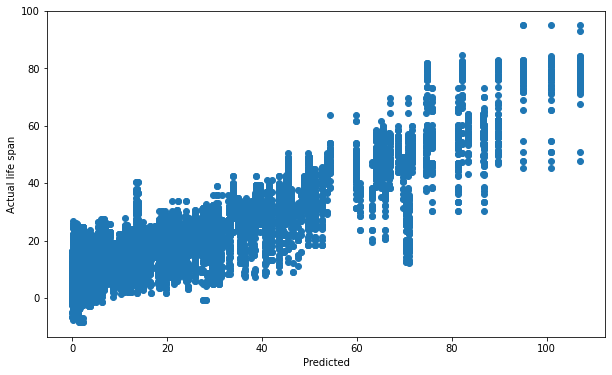

In [56]:
# Plotting scatter plot between actual and predicted values of mortality rate
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Predicted")
plt.ylabel("Actual life span")

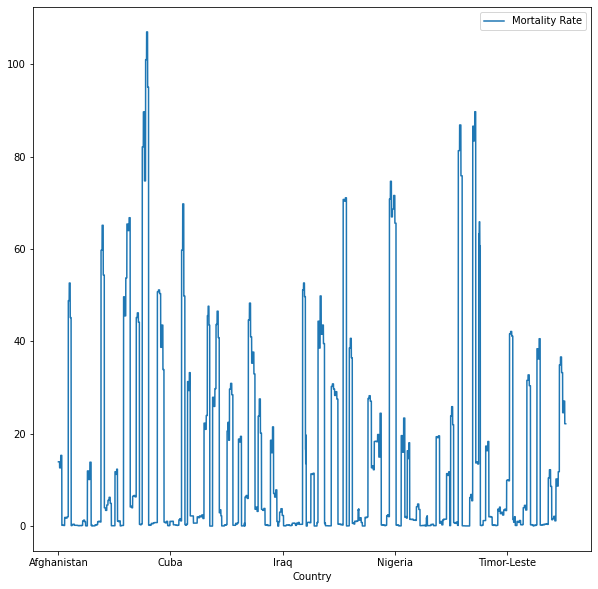

In [57]:
df.plot(x='Country', y='Mortality Rate', figsize=(10,10))

Text(0.5, 0, 'Year')

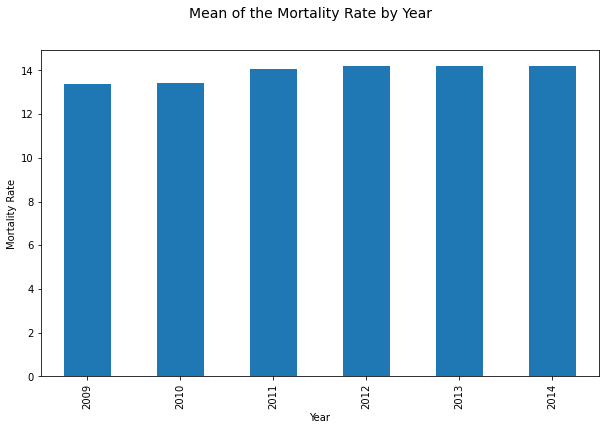

In [58]:
df.groupby('Year')['Mortality Rate'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Mean of the Mortality Rate by Year', fontsize=14)
plt.ylabel('Mortality Rate')
plt.xlabel('Year')

In [59]:
x = df['Service Type'].tolist()
y = df['Year'].tolist()

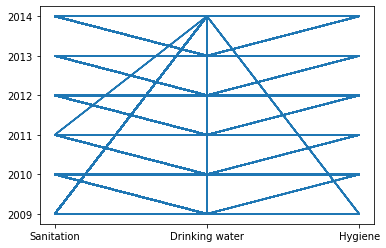

In [60]:
plt.plot(x,y)
plt.show()

In [61]:
df['Service Type'].unique()

array(['Sanitation', 'Drinking water', 'Hygiene'], dtype=object)

In [62]:
df['Service Type'] = df['Service Type'].map({'Sanitation':1, 'Drinking water':2, 'Hygiene' : 3})

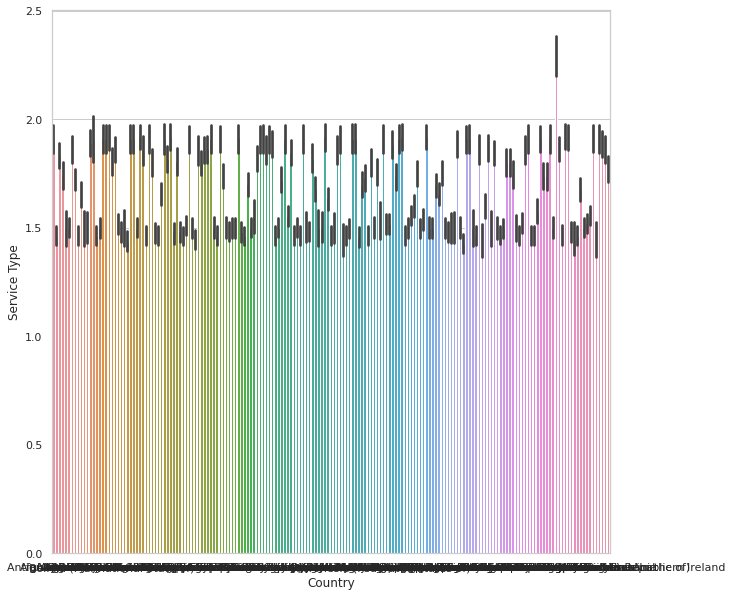

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Country", y="Service Type", data=df)

In [64]:
import warnings
warnings.filterwarnings("ignore")

Country
Afghanistan                           AxesSubplot(0.125,0.125;0.775x0.755)
Albania                               AxesSubplot(0.125,0.125;0.775x0.755)
Algeria                               AxesSubplot(0.125,0.125;0.775x0.755)
Angola                                AxesSubplot(0.125,0.125;0.775x0.755)
Antigua and Barbuda                   AxesSubplot(0.125,0.125;0.775x0.755)
                                                      ...                 
Venezuela (Bolivarian Republic of)    AxesSubplot(0.125,0.125;0.775x0.755)
Viet Nam                              AxesSubplot(0.125,0.125;0.775x0.755)
Yemen                                 AxesSubplot(0.125,0.125;0.775x0.755)
Zambia                                AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe                              AxesSubplot(0.125,0.125;0.775x0.755)
Length: 181, dtype: object

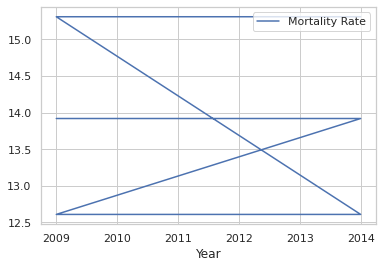

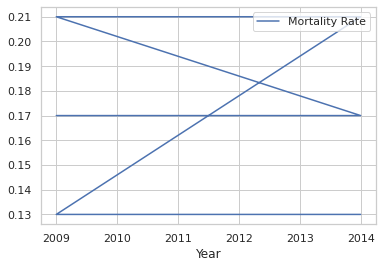

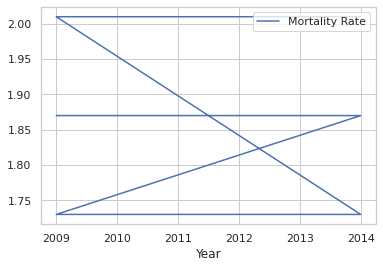

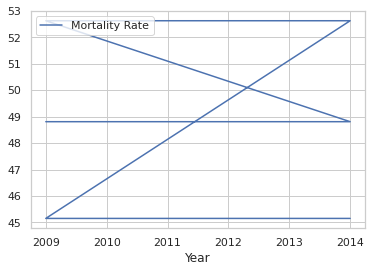

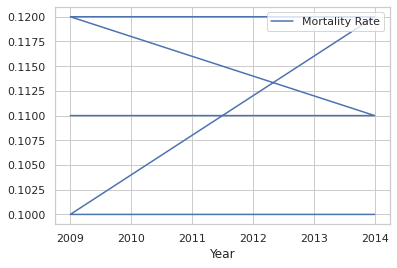

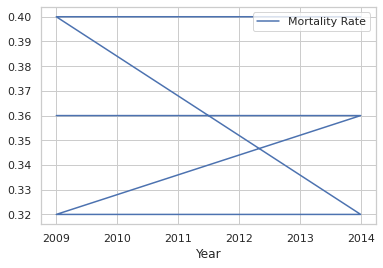

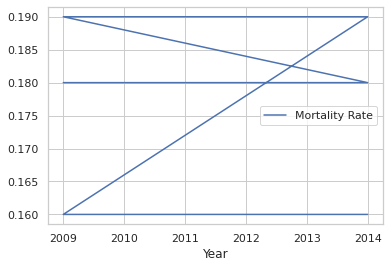

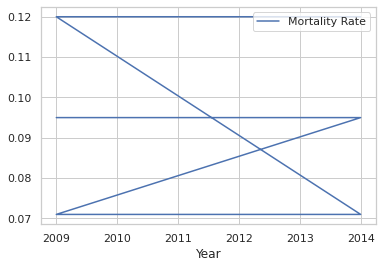

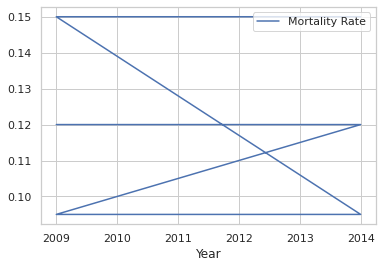

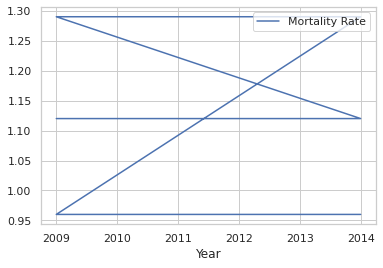

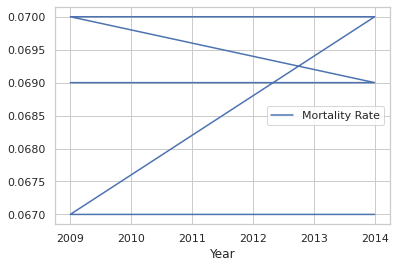

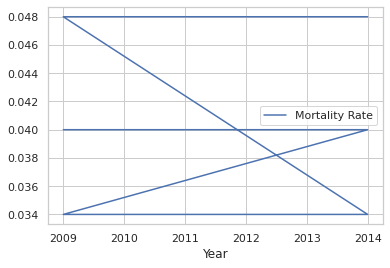

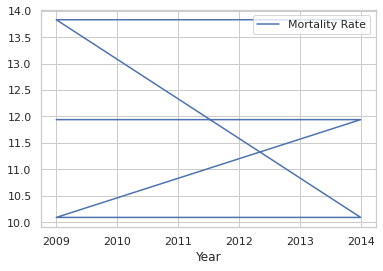

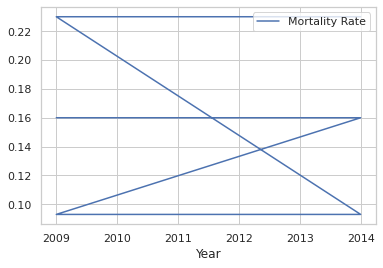

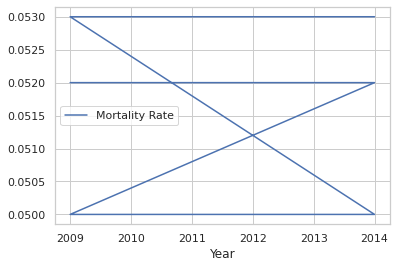

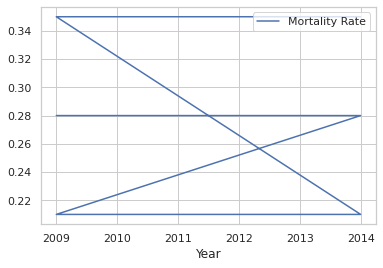

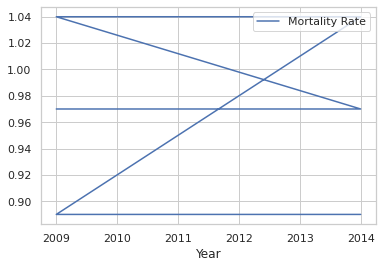

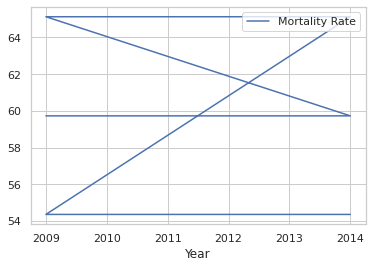

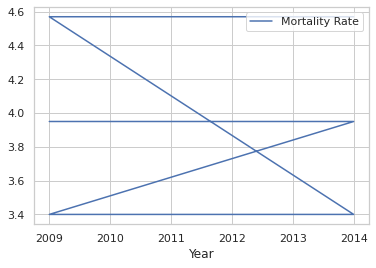

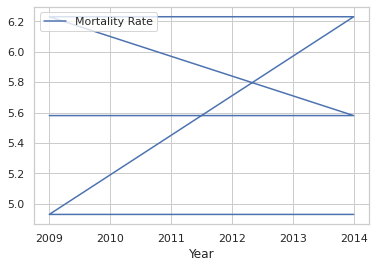

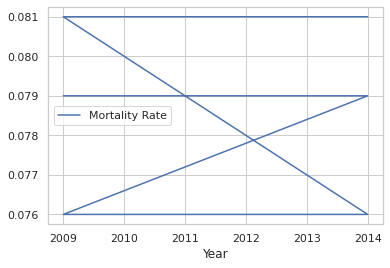

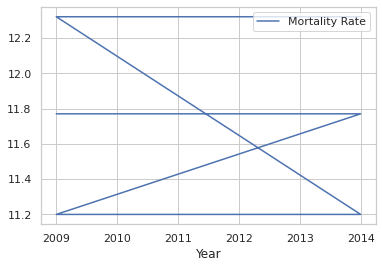

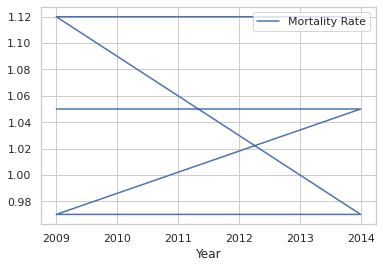

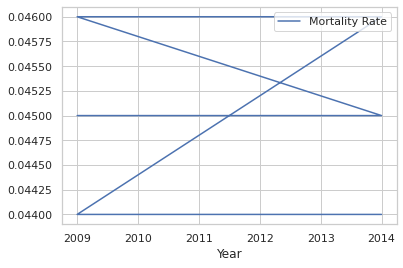

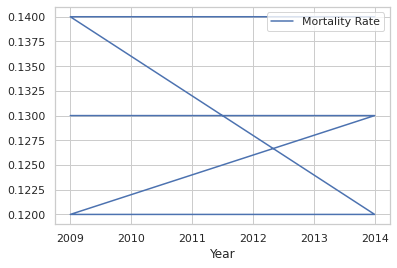

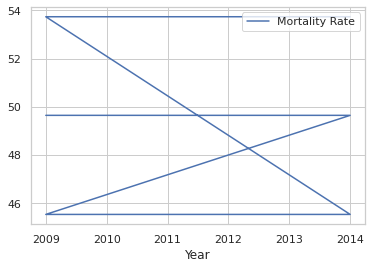

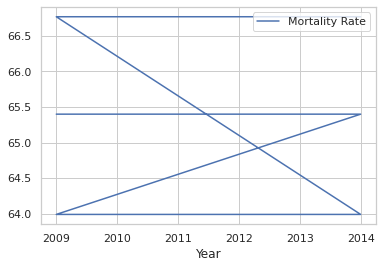

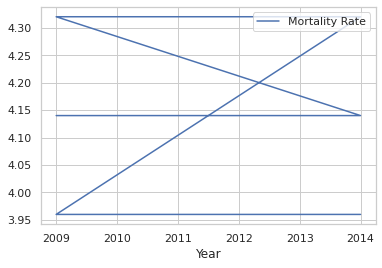

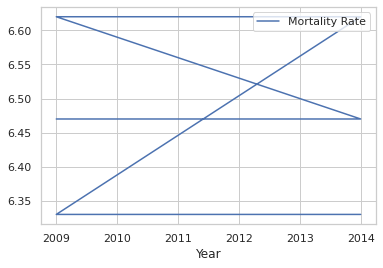

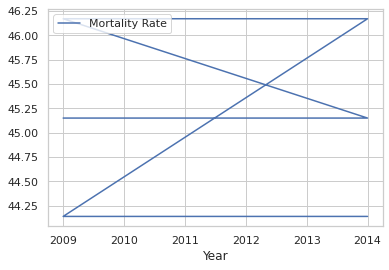

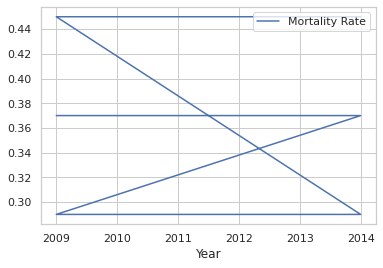

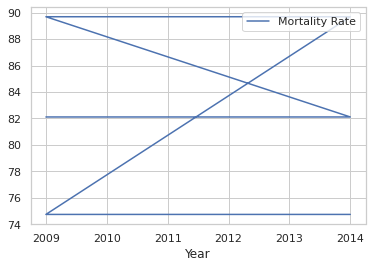

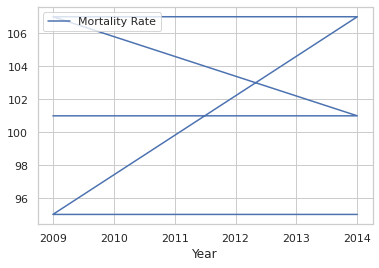

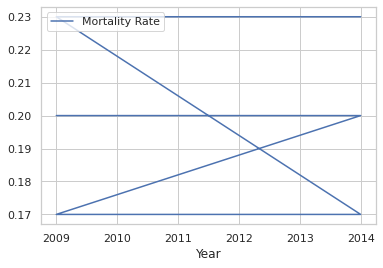

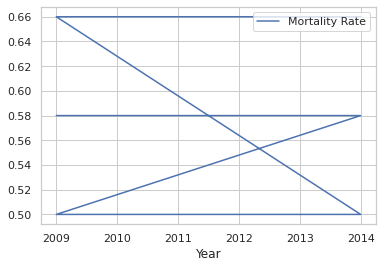

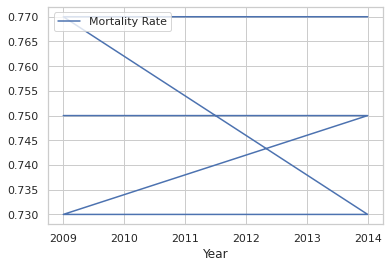

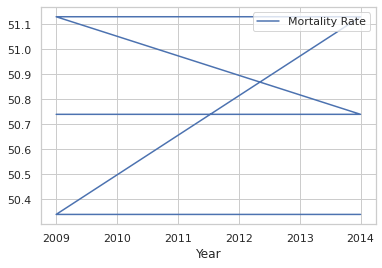

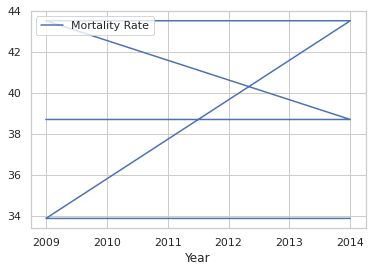

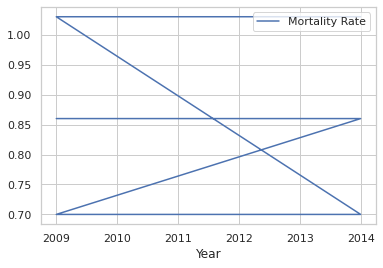

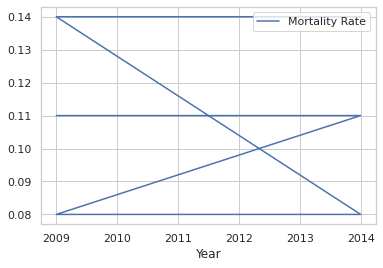

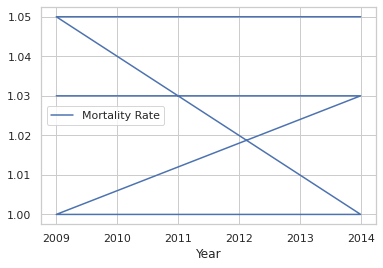

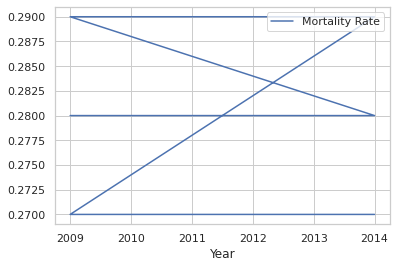

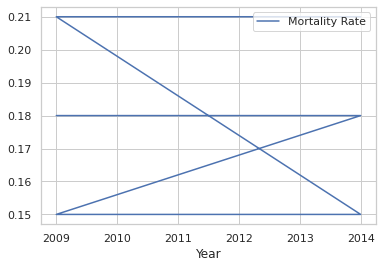

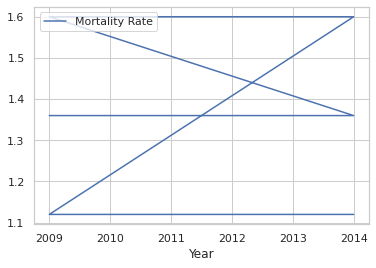

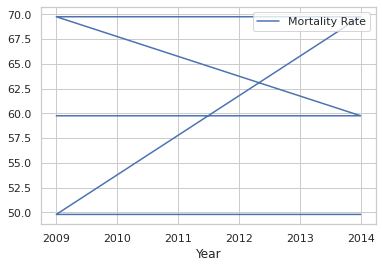

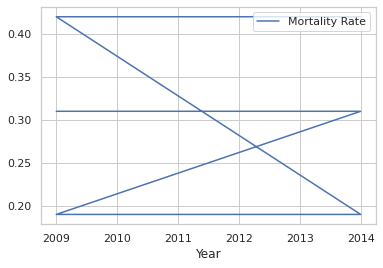

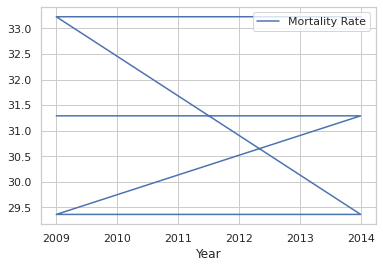

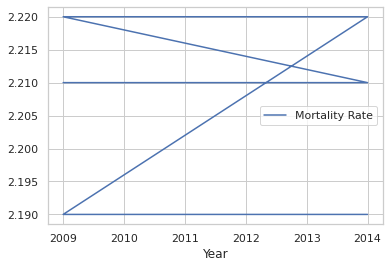

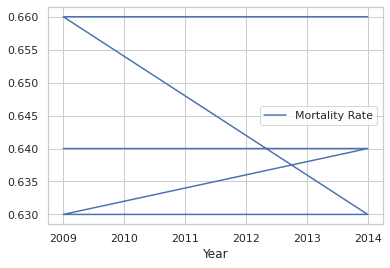

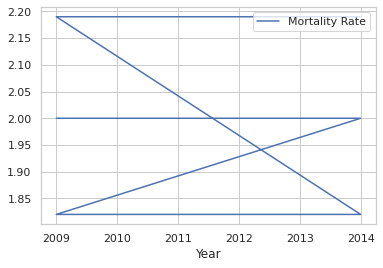

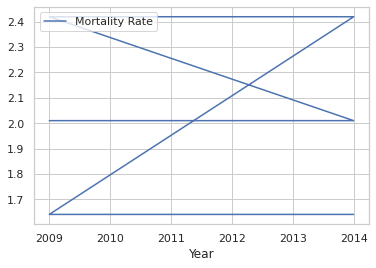

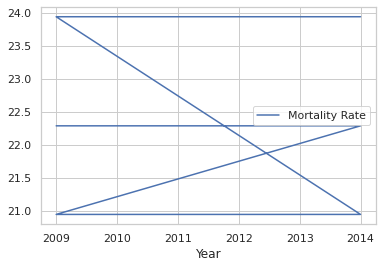

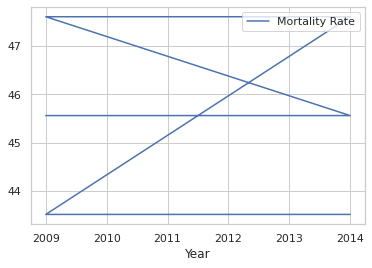

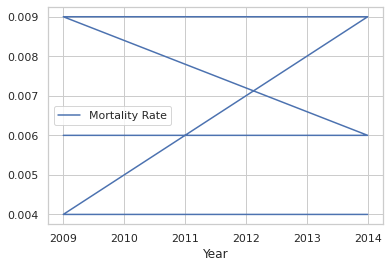

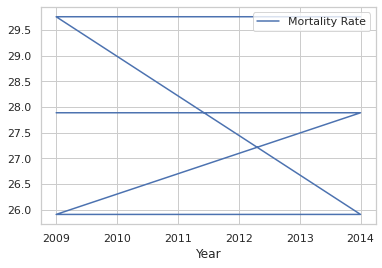

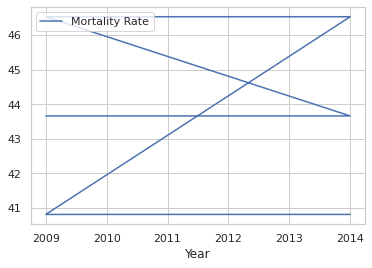

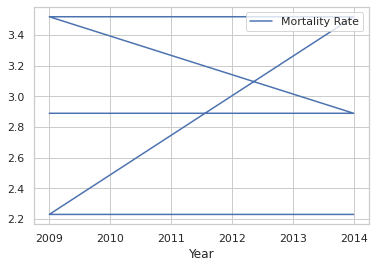

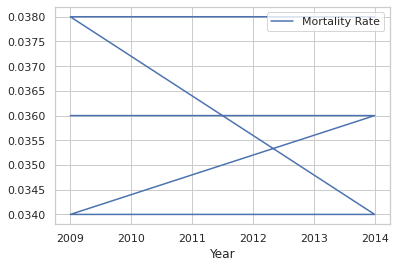

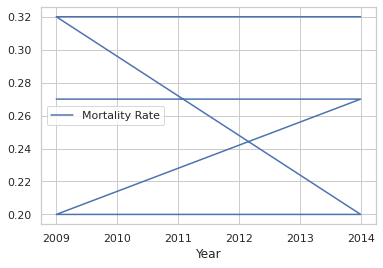

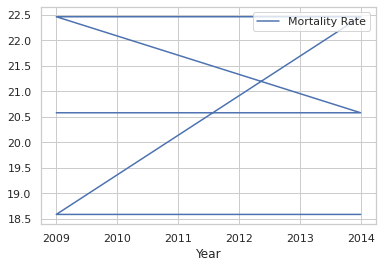

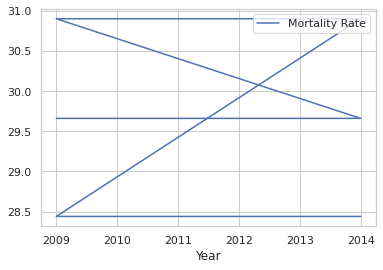

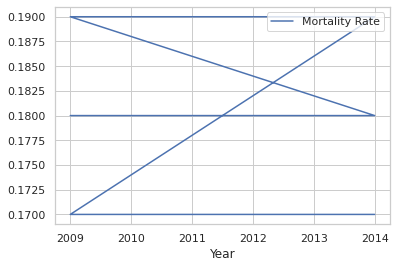

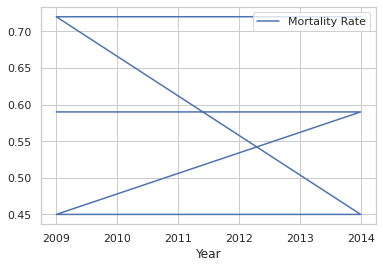

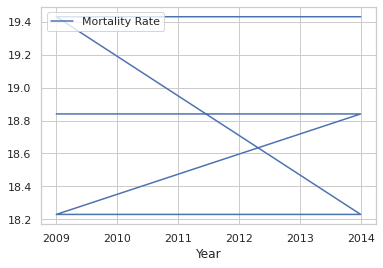

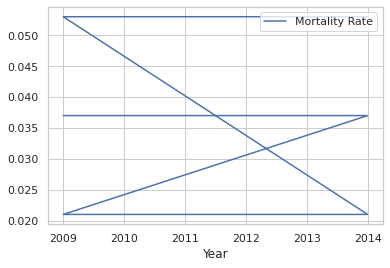

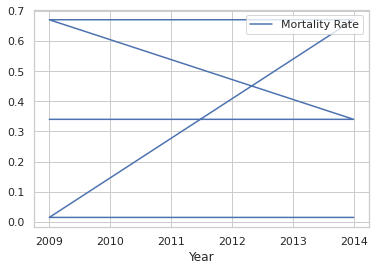

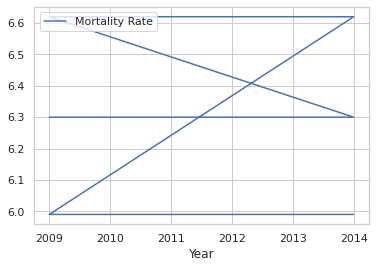

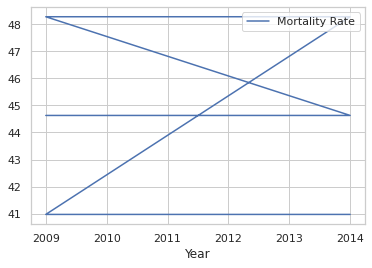

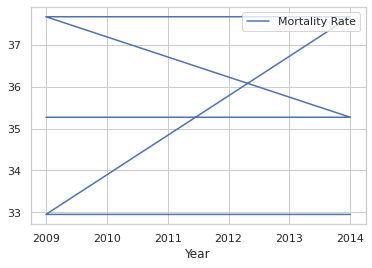

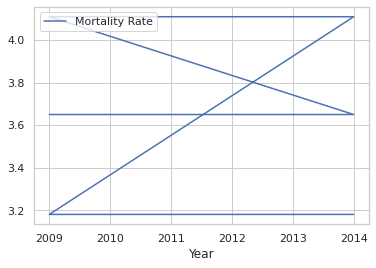

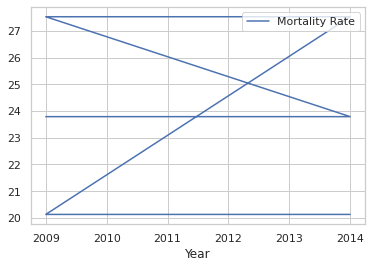

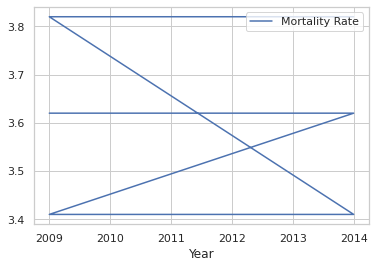

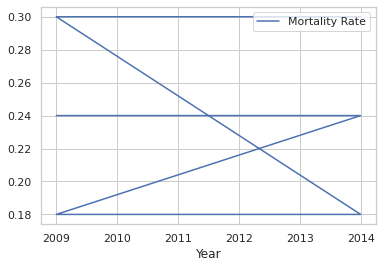

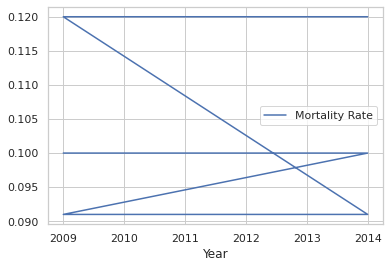

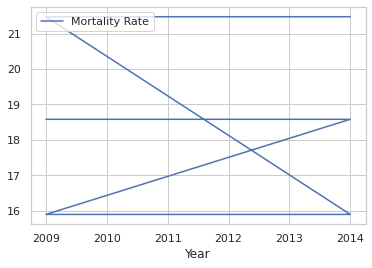

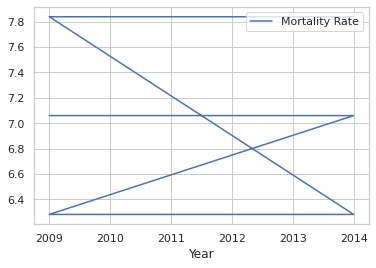

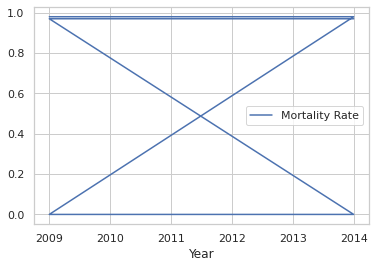

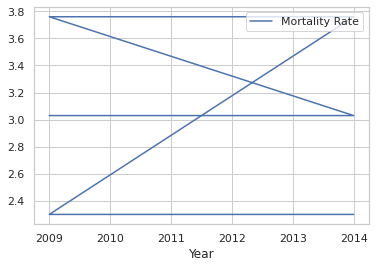

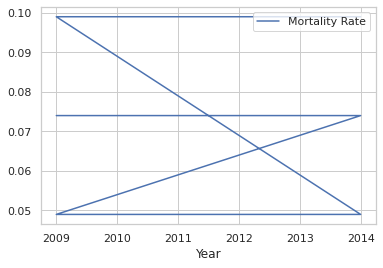

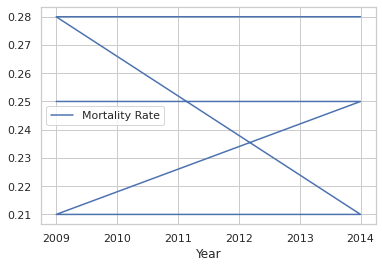

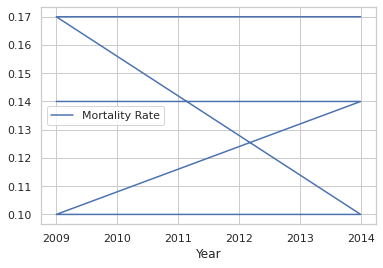

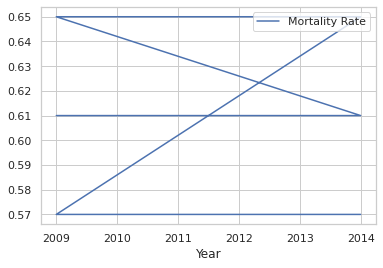

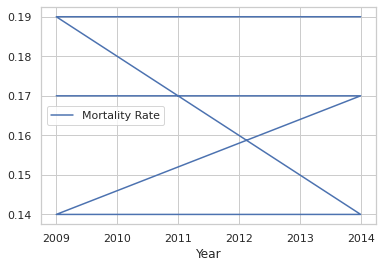

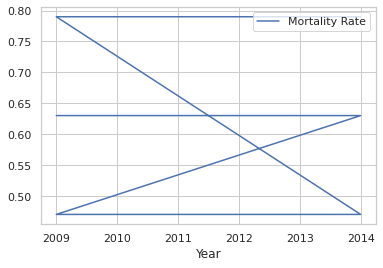

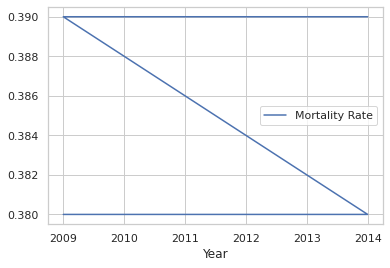

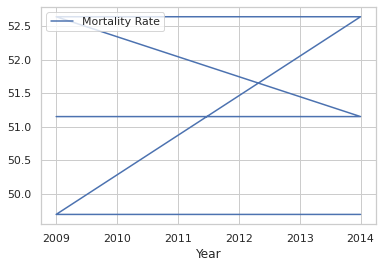

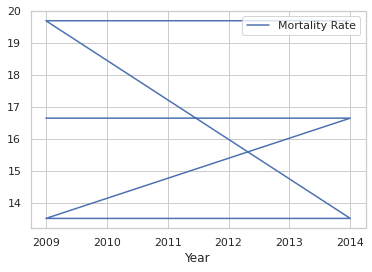

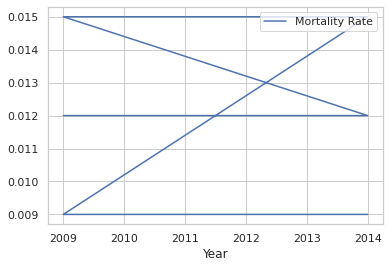

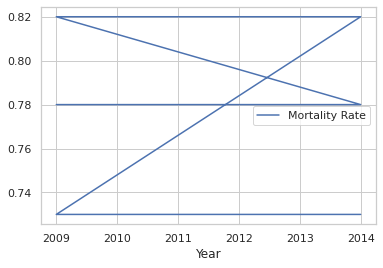

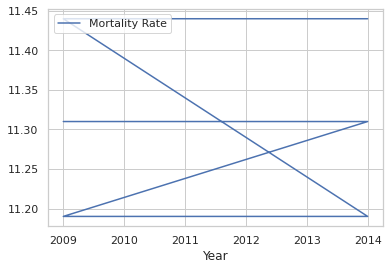

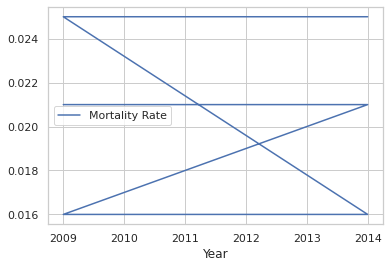

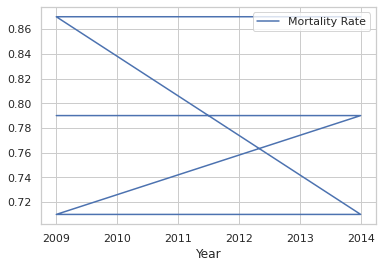

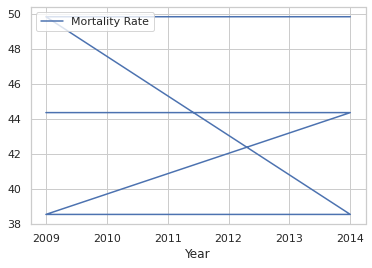

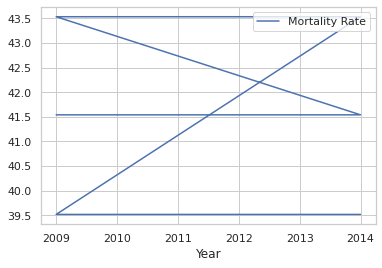

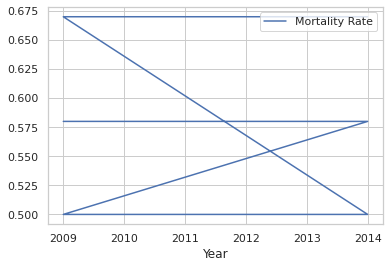

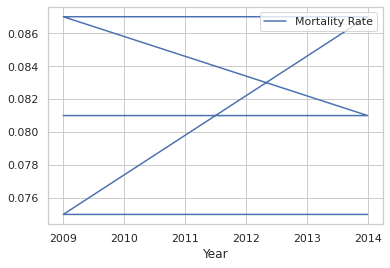

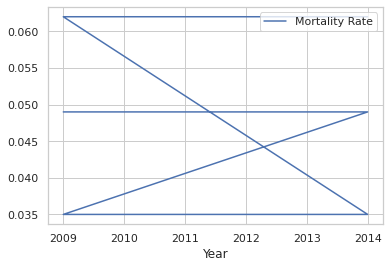

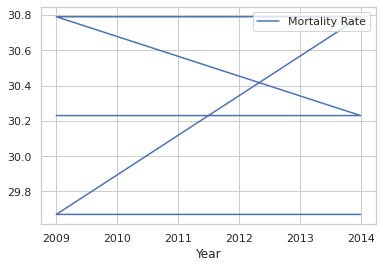

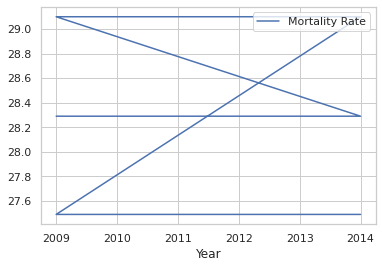

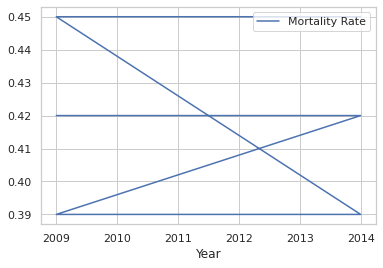

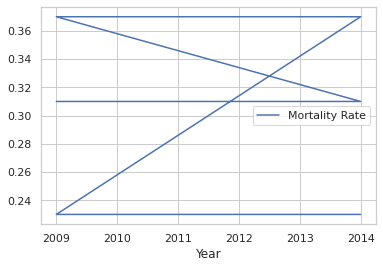

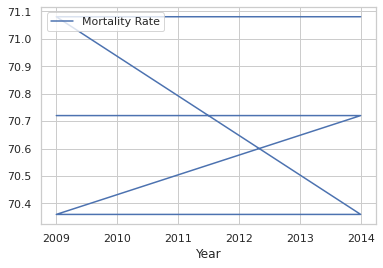

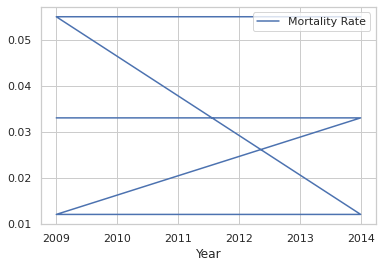

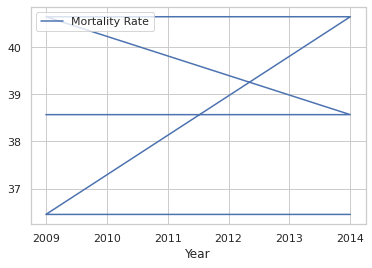

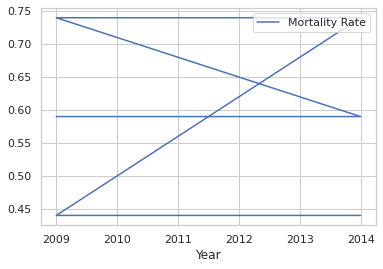

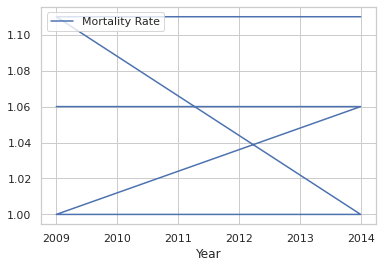

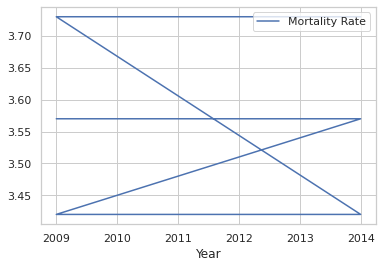

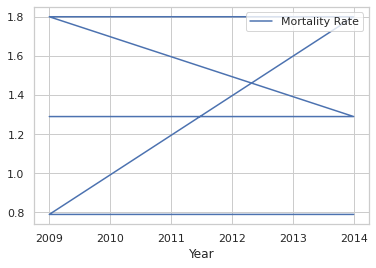

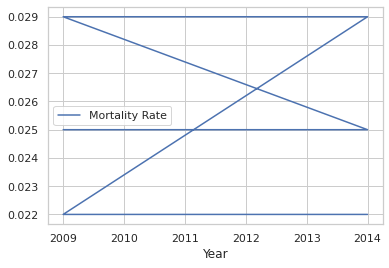

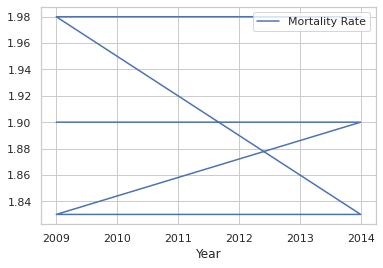

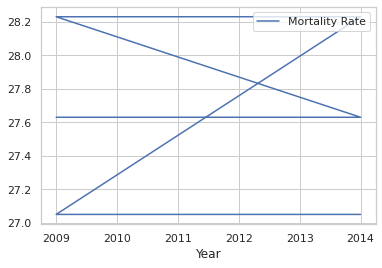

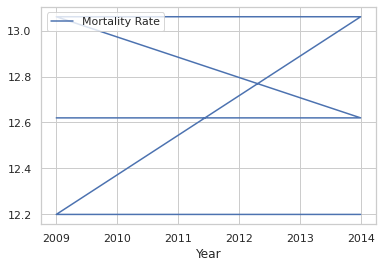

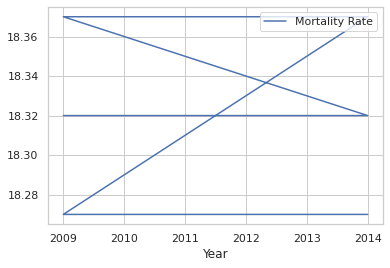

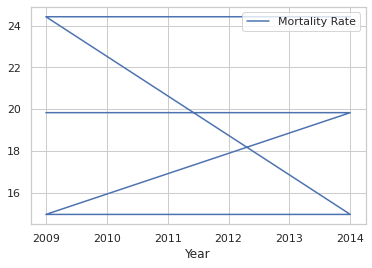

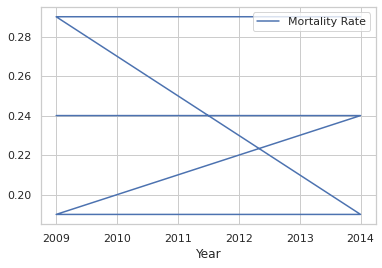

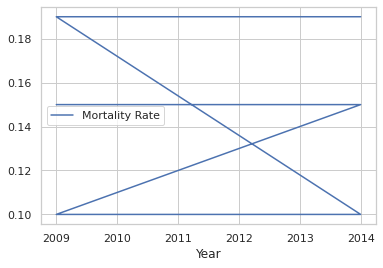

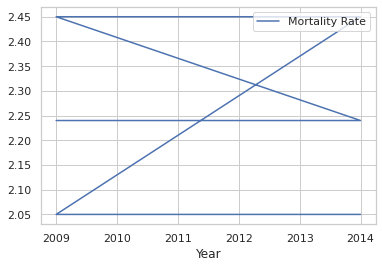

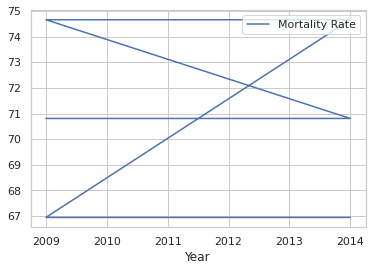

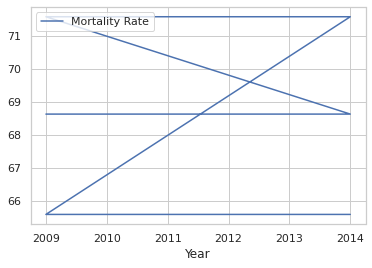

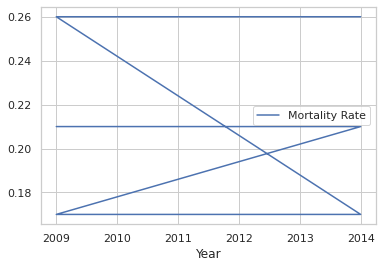

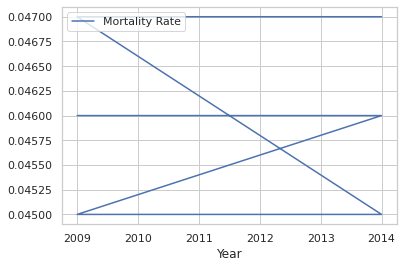

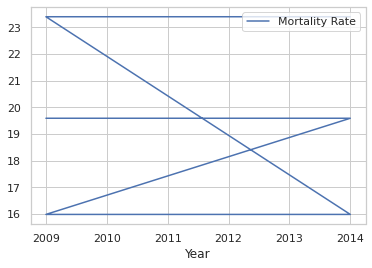

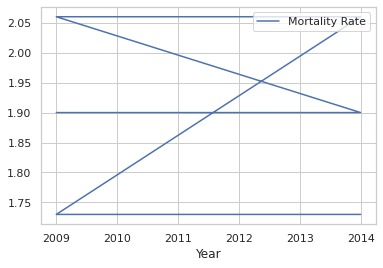

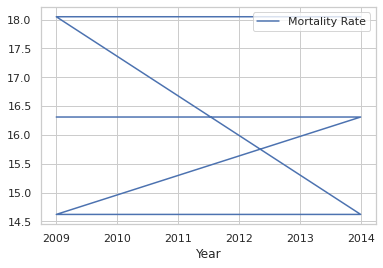

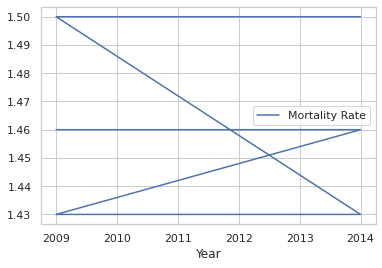

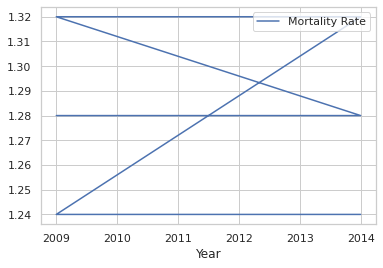

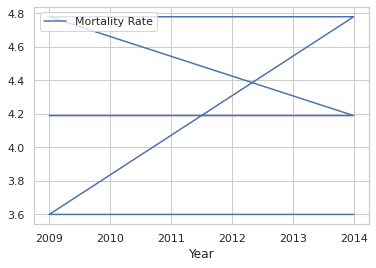

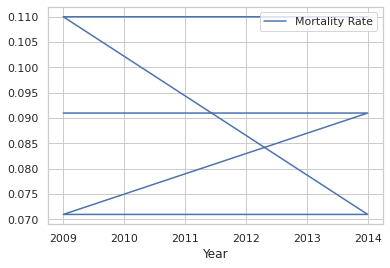

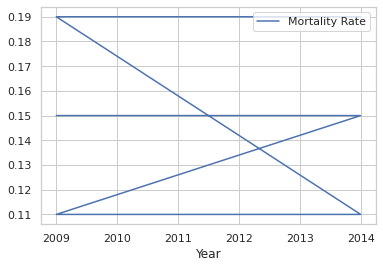

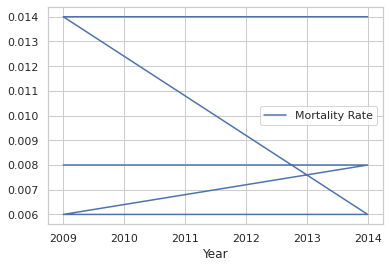

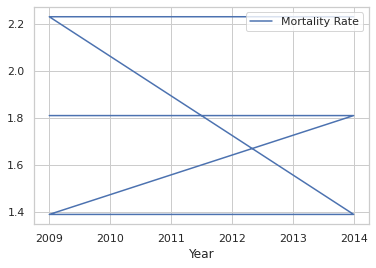

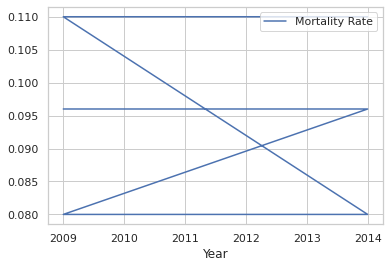

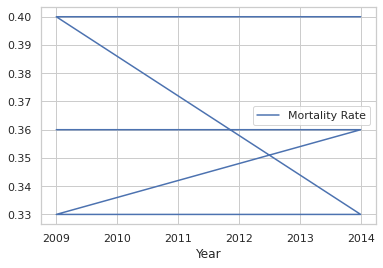

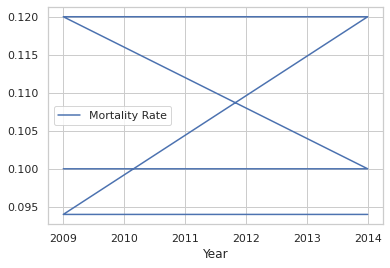

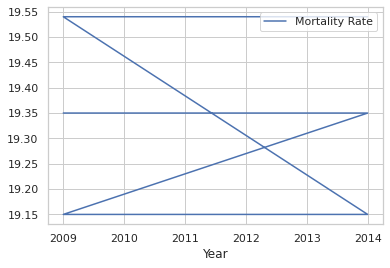

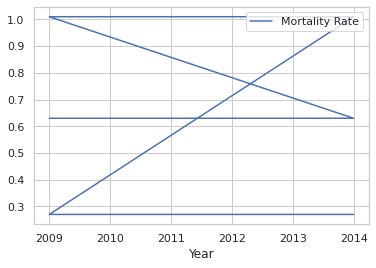

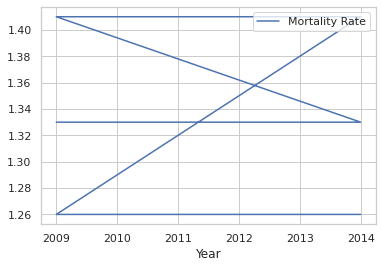

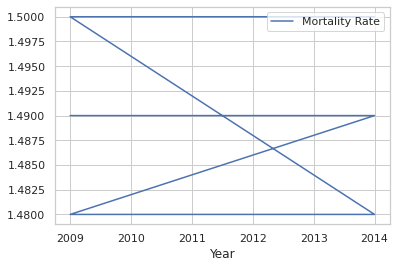

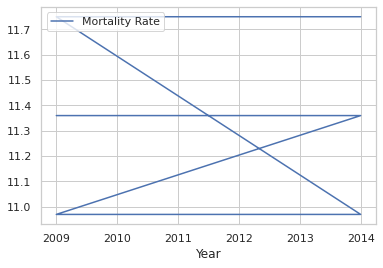

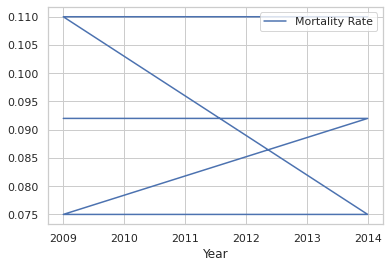

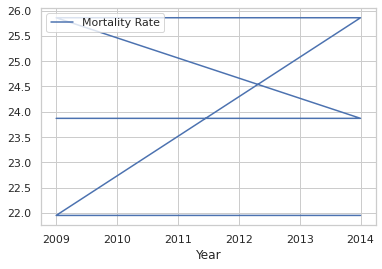

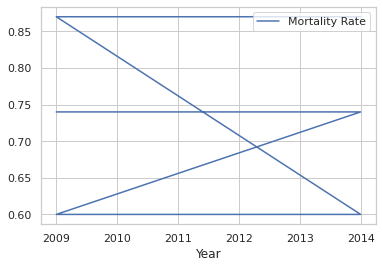

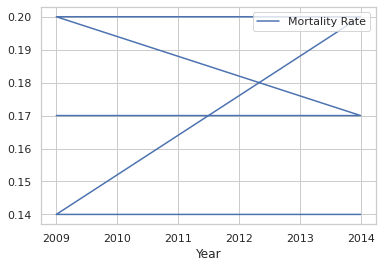

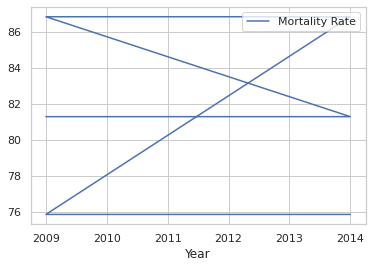

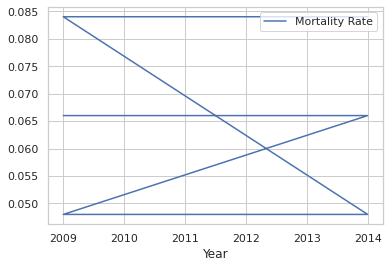

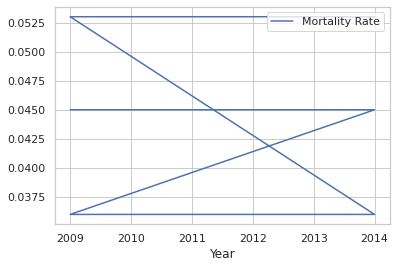

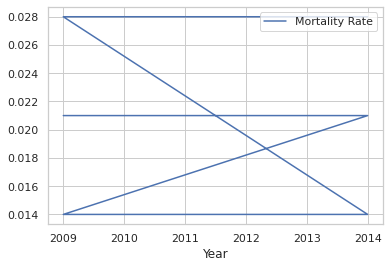

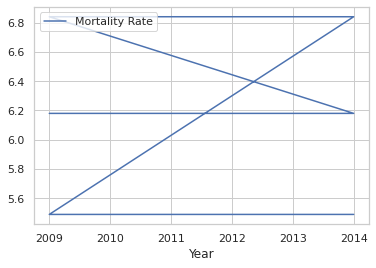

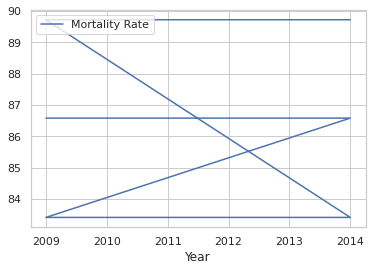

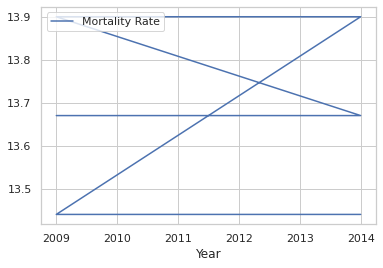

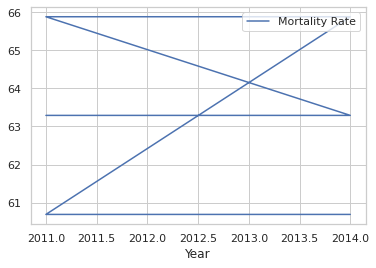

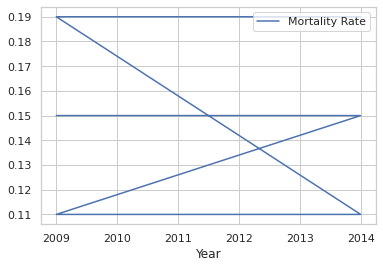

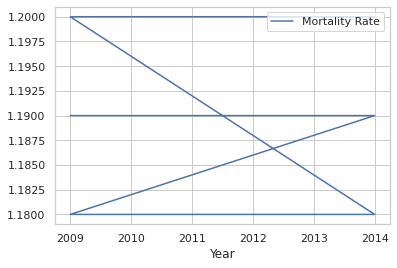

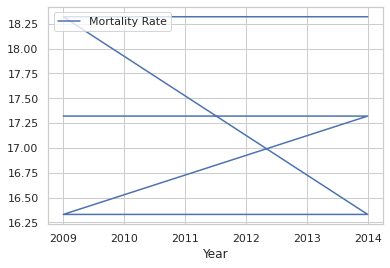

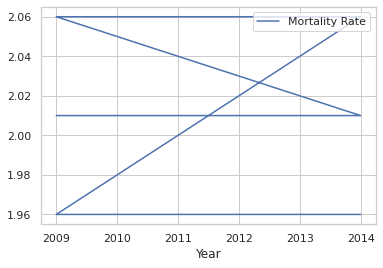

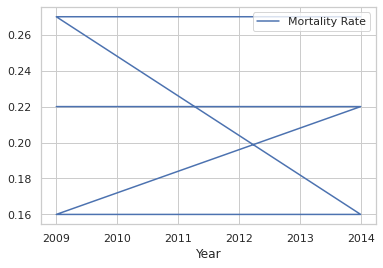

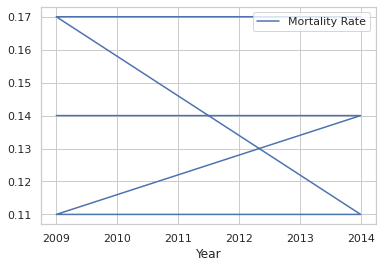

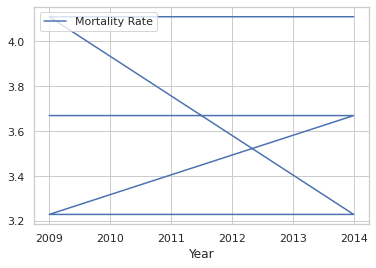

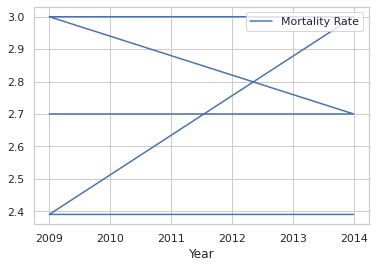

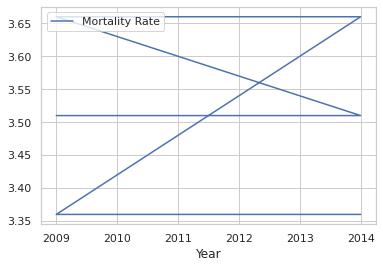

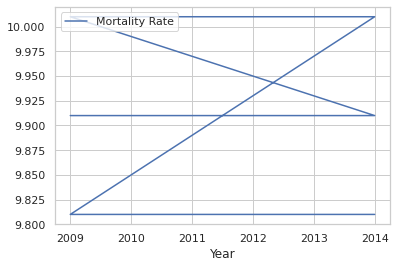

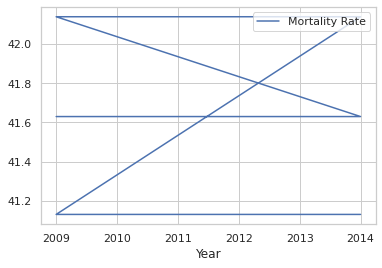

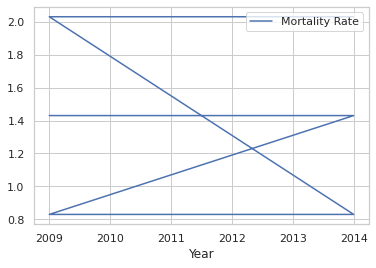

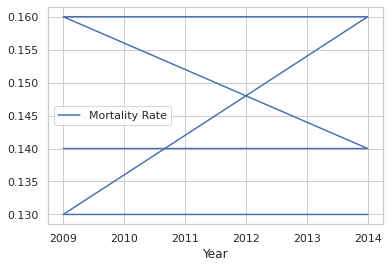

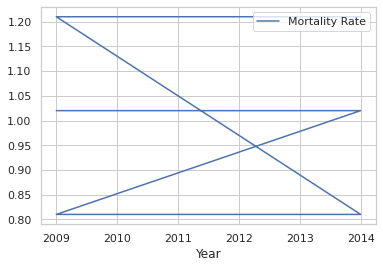

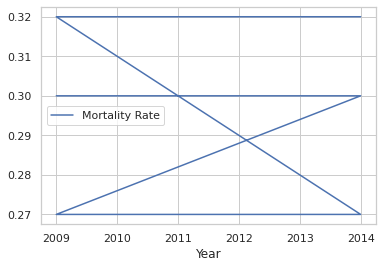

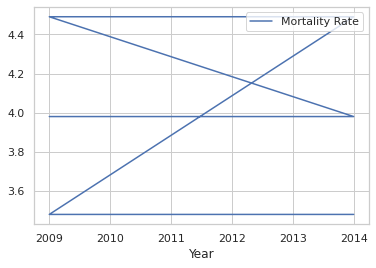

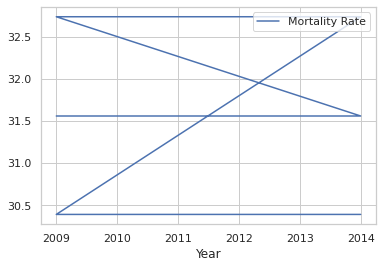

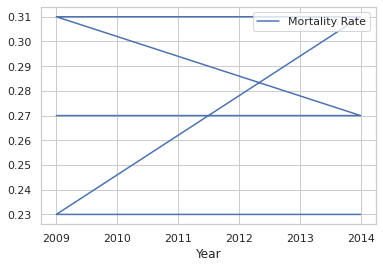

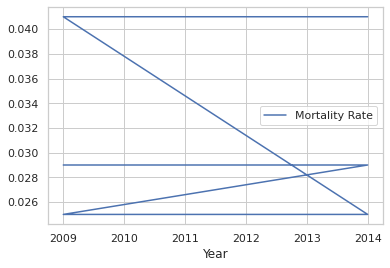

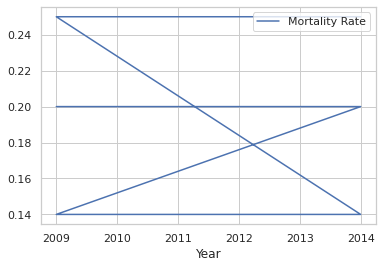

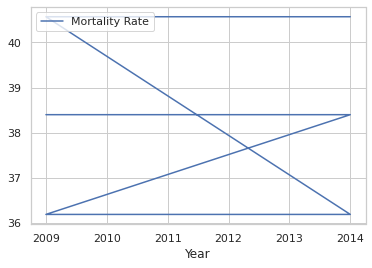

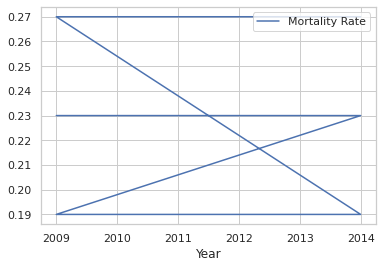

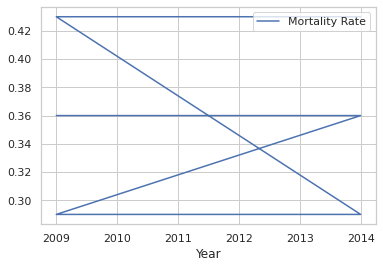

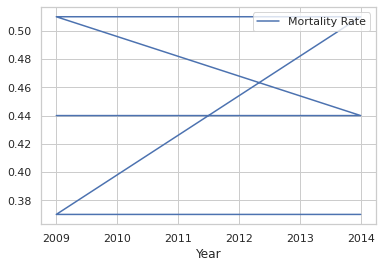

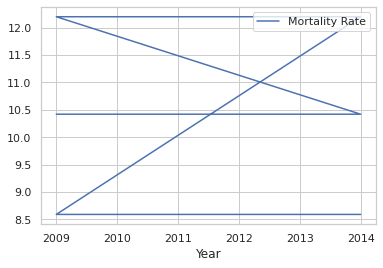

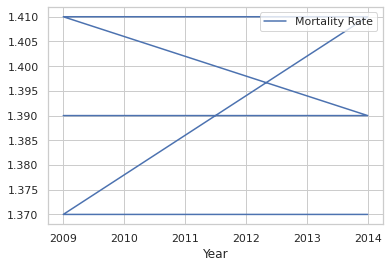

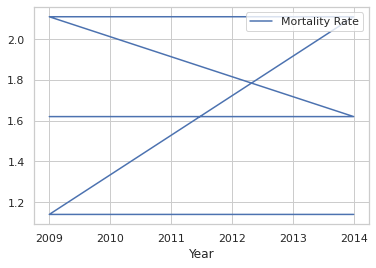

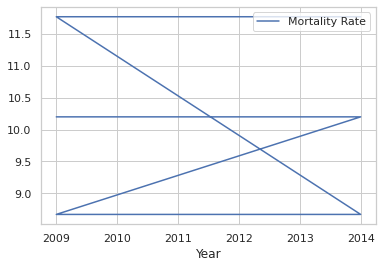

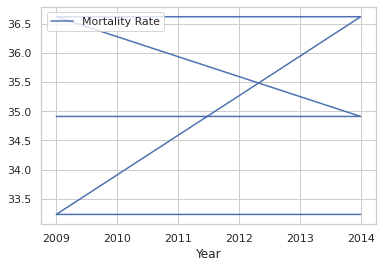

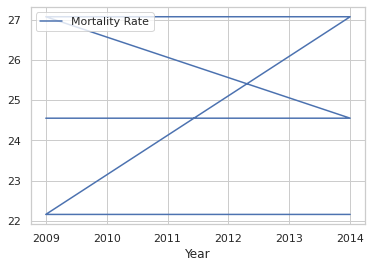

In [65]:
df.groupby('Country').plot(x='Year', y='Mortality Rate')

Country
Afghanistan                           AxesSubplot(0.125,0.125;0.775x0.755)
Albania                               AxesSubplot(0.125,0.125;0.775x0.755)
Algeria                               AxesSubplot(0.125,0.125;0.775x0.755)
Angola                                AxesSubplot(0.125,0.125;0.775x0.755)
Antigua and Barbuda                   AxesSubplot(0.125,0.125;0.775x0.755)
                                                      ...                 
Venezuela (Bolivarian Republic of)    AxesSubplot(0.125,0.125;0.775x0.755)
Viet Nam                              AxesSubplot(0.125,0.125;0.775x0.755)
Yemen                                 AxesSubplot(0.125,0.125;0.775x0.755)
Zambia                                AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe                              AxesSubplot(0.125,0.125;0.775x0.755)
Length: 181, dtype: object

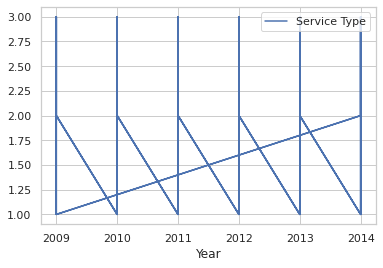

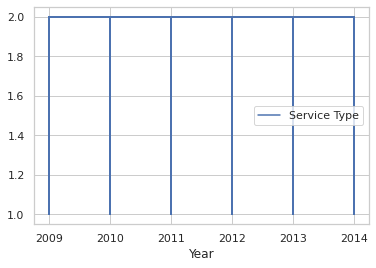

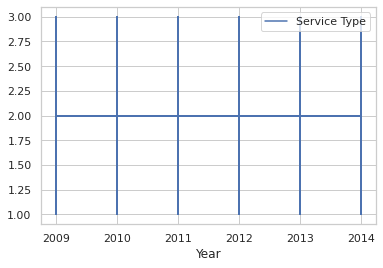

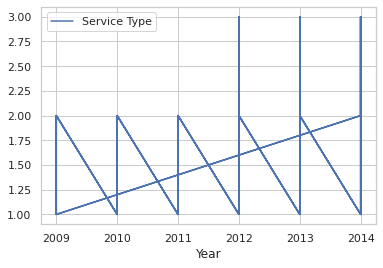

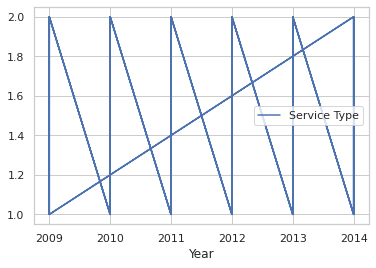

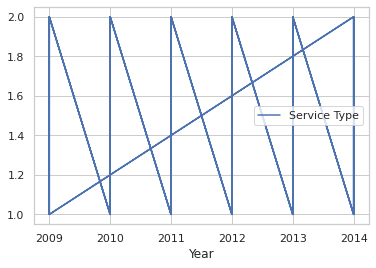

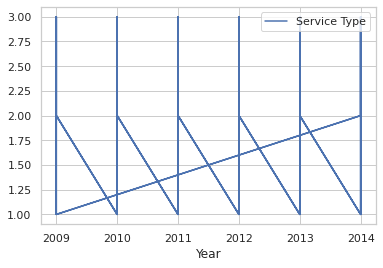

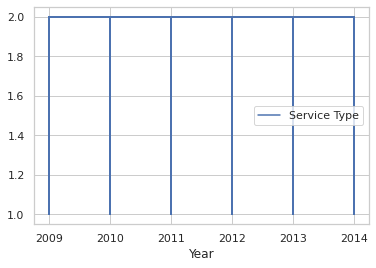

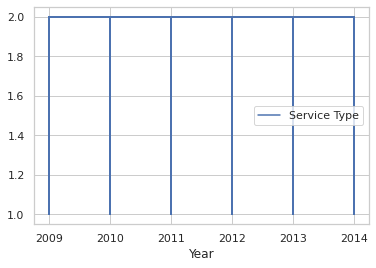

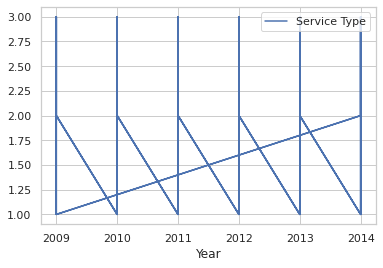

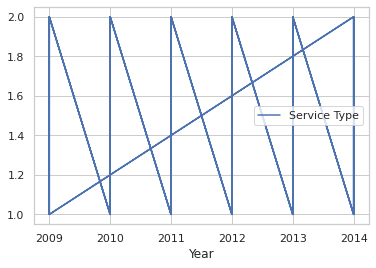

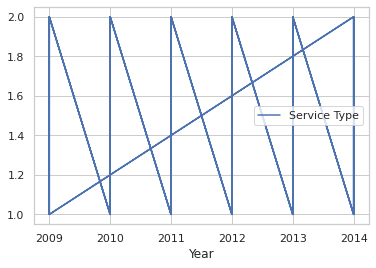

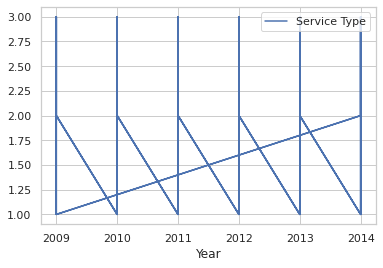

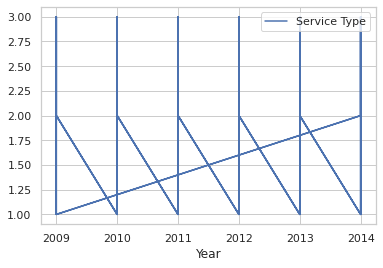

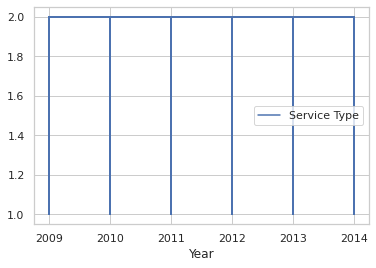

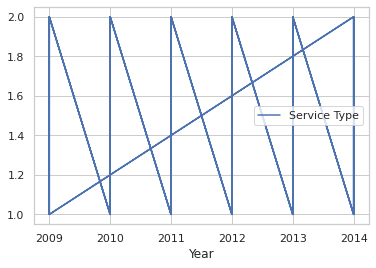

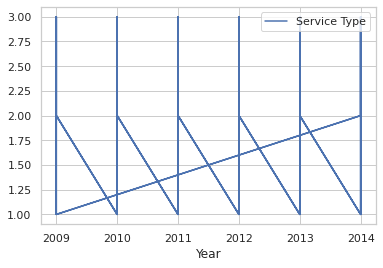

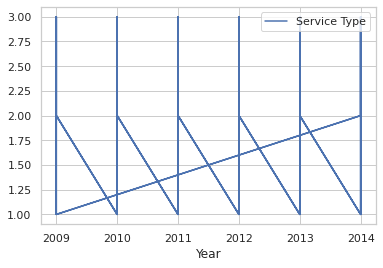

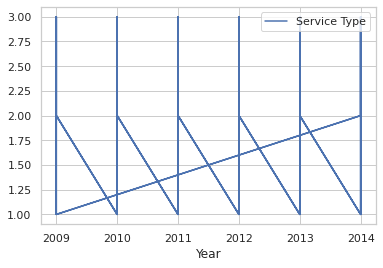

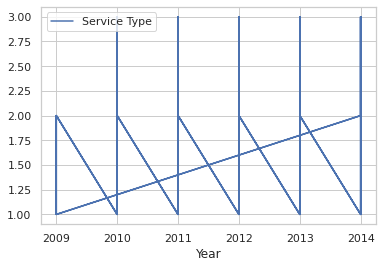

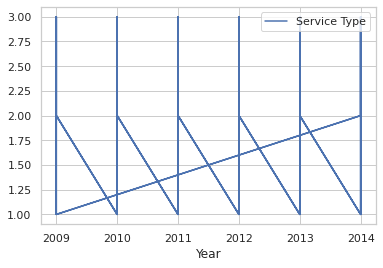

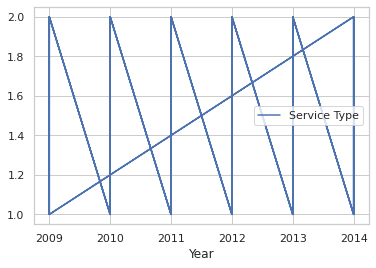

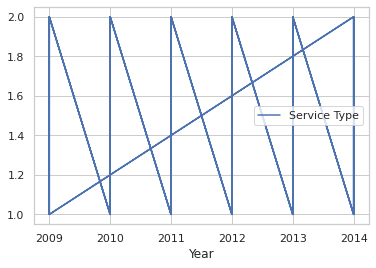

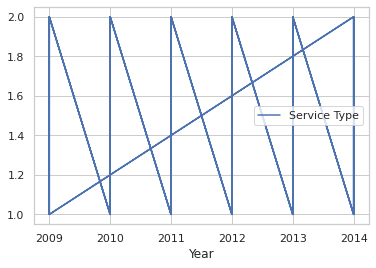

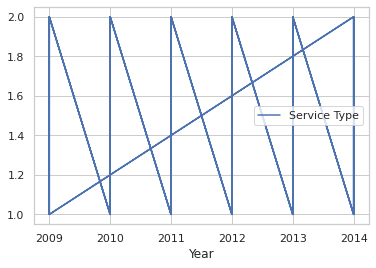

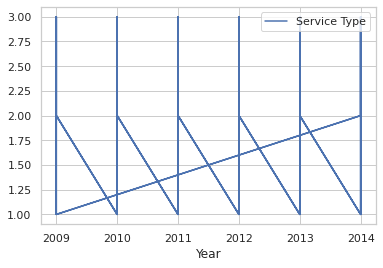

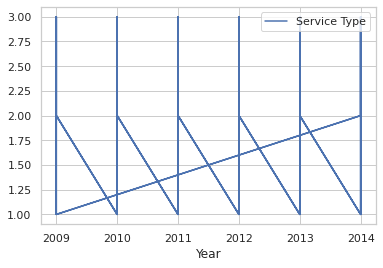

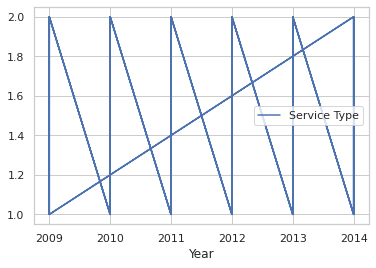

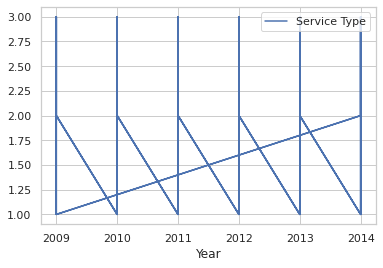

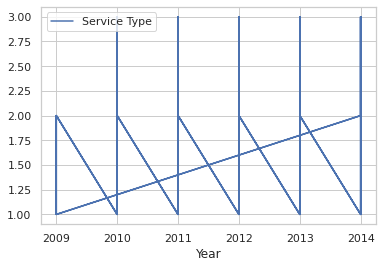

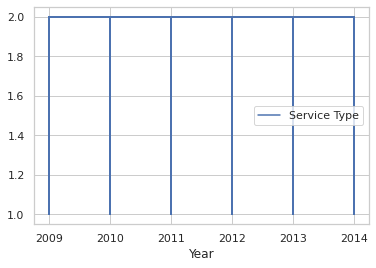

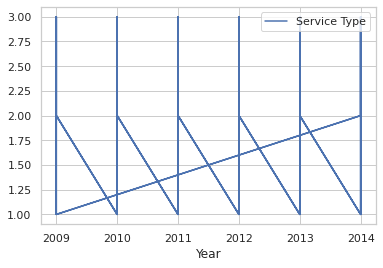

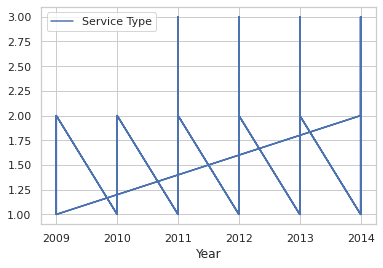

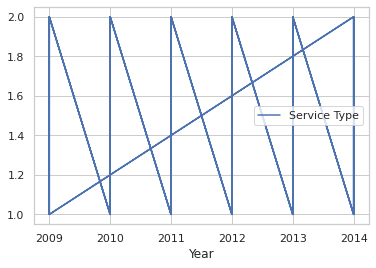

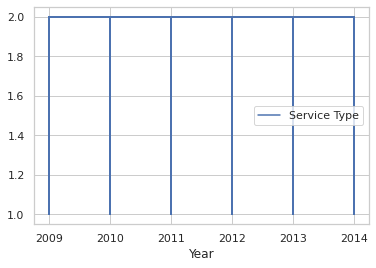

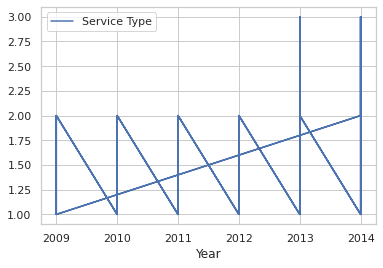

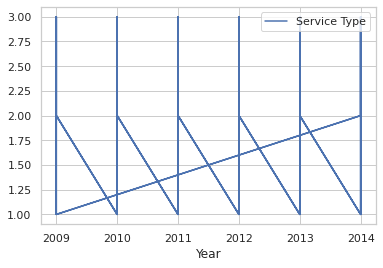

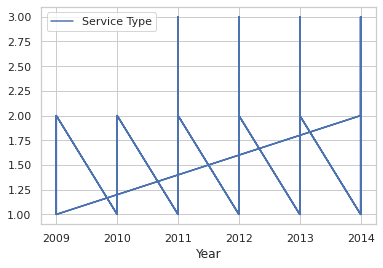

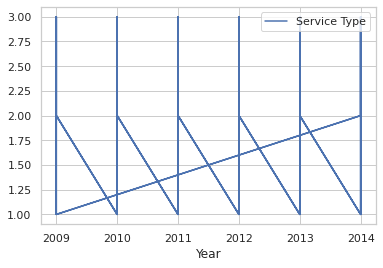

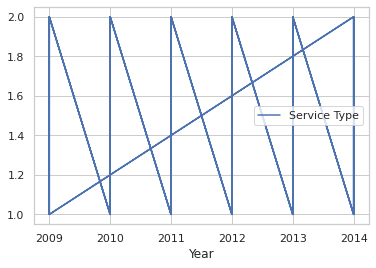

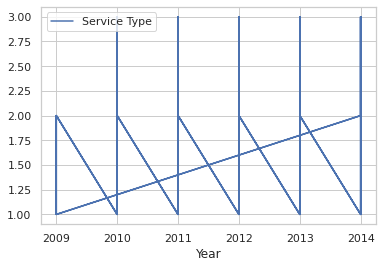

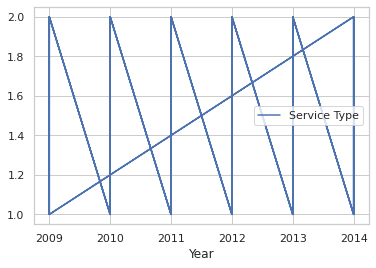

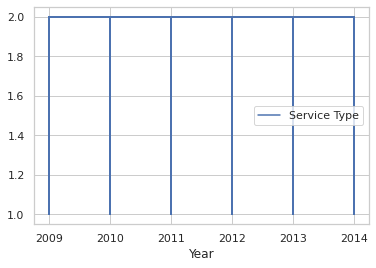

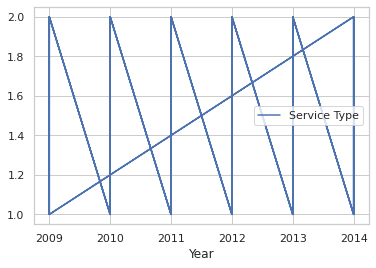

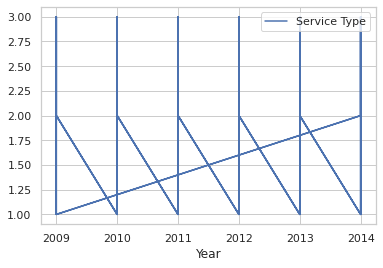

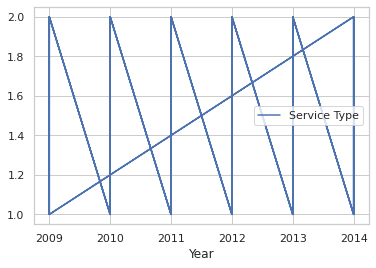

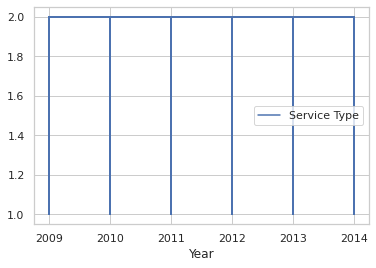

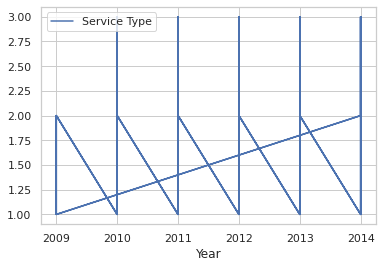

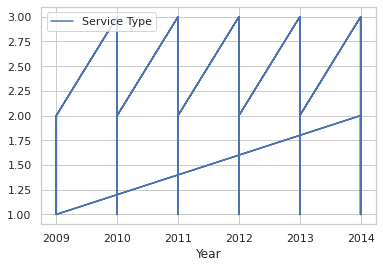

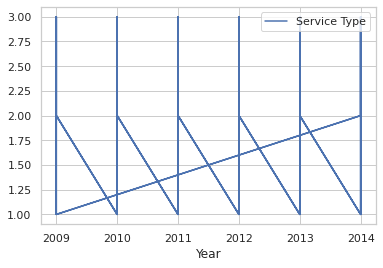

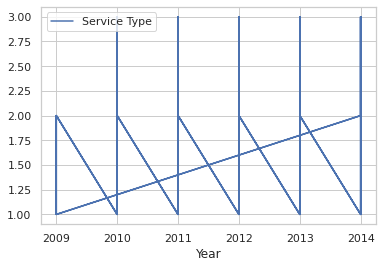

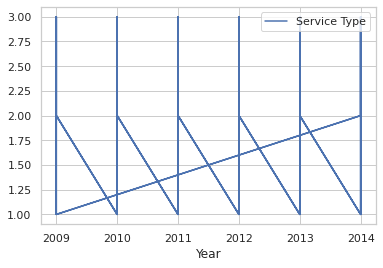

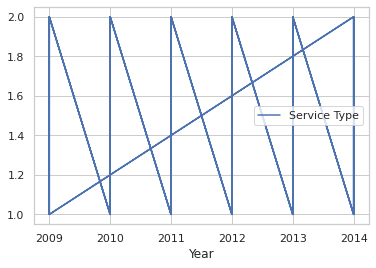

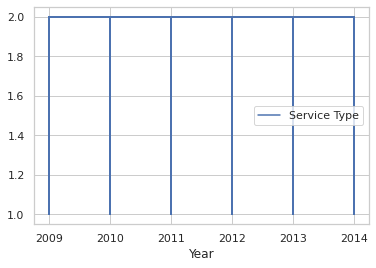

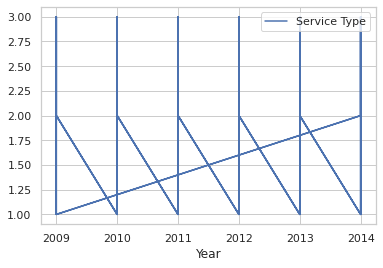

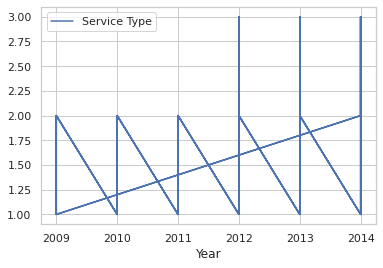

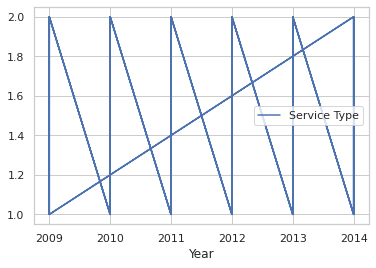

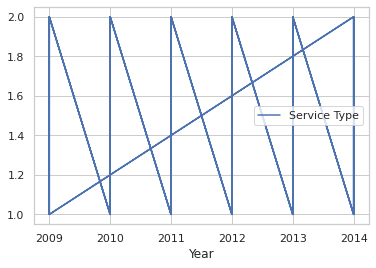

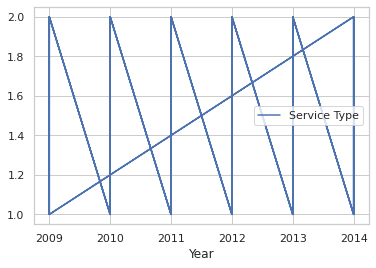

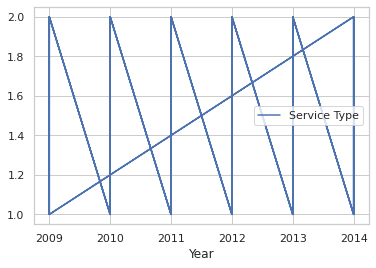

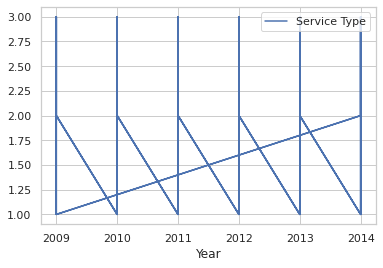

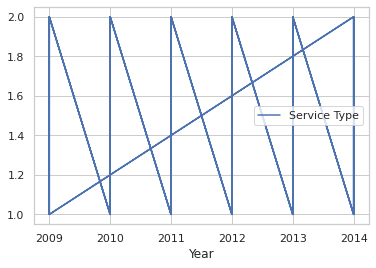

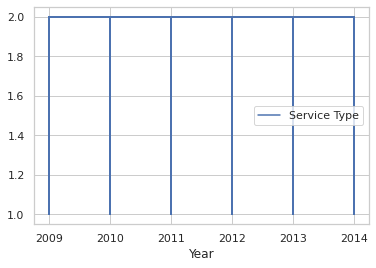

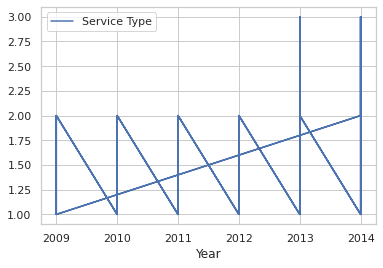

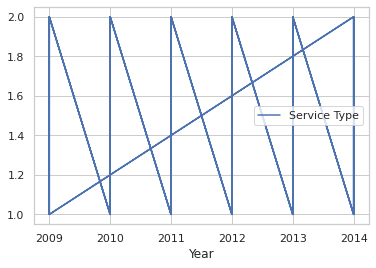

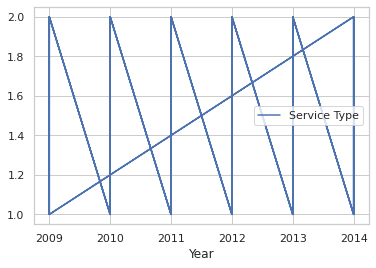

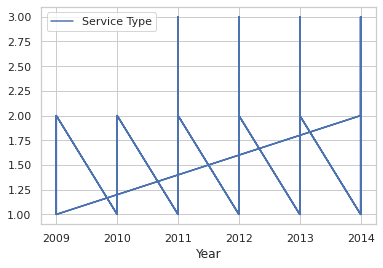

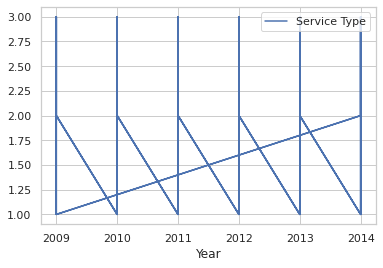

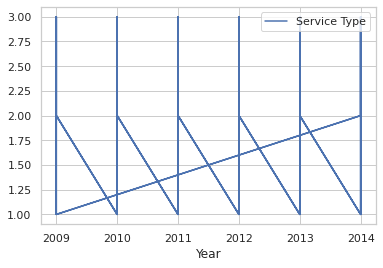

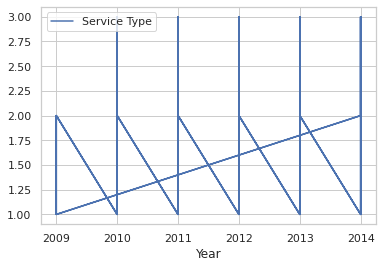

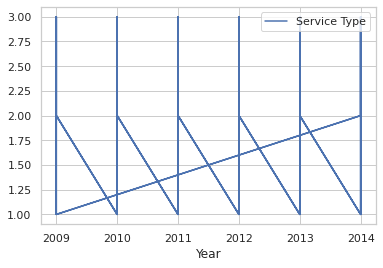

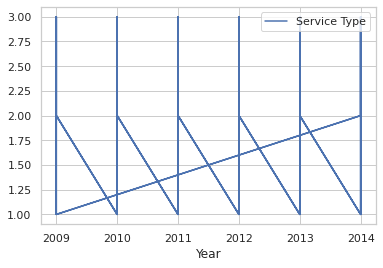

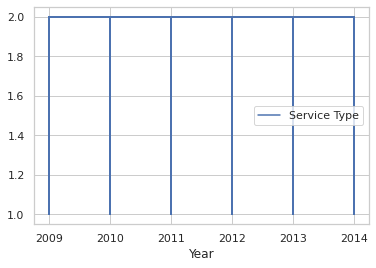

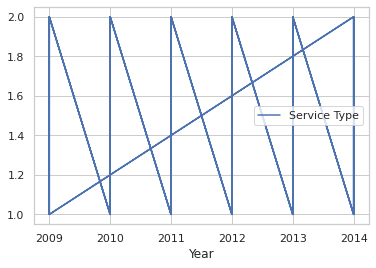

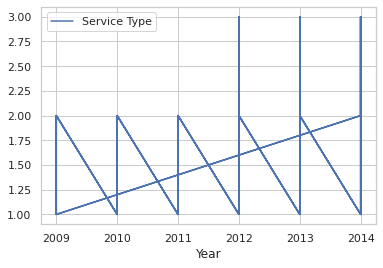

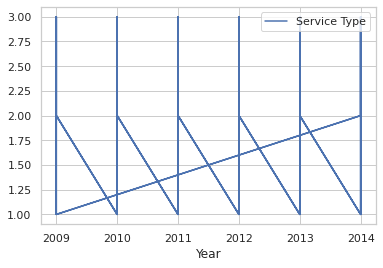

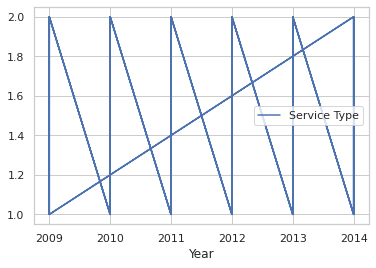

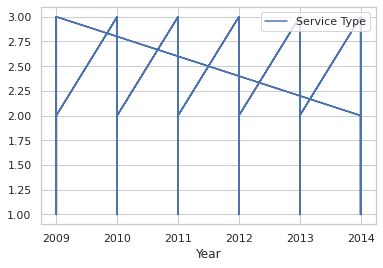

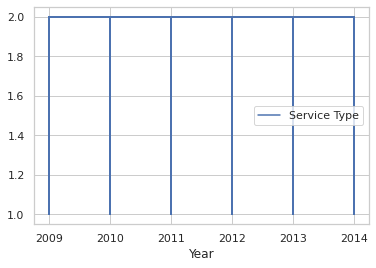

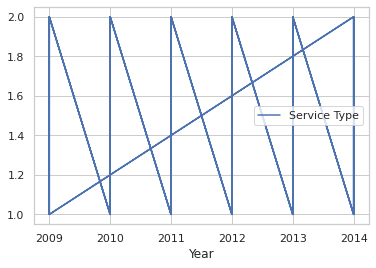

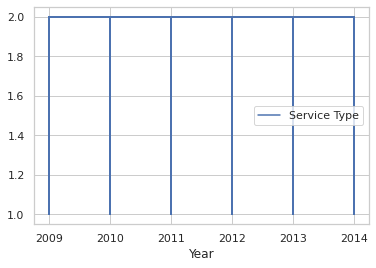

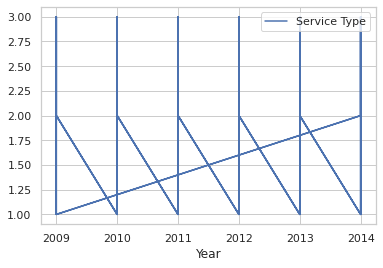

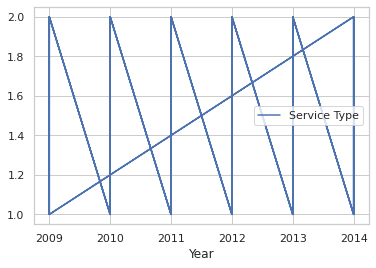

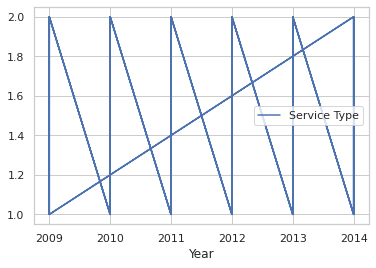

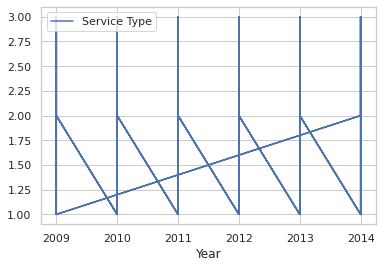

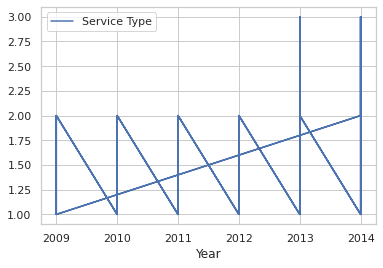

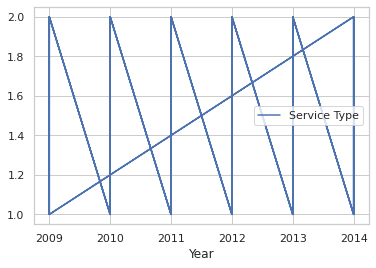

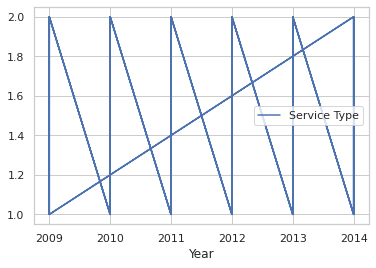

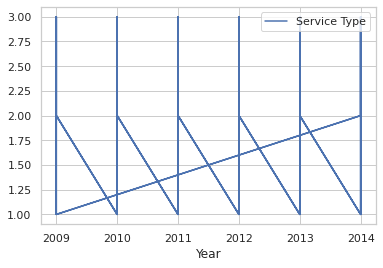

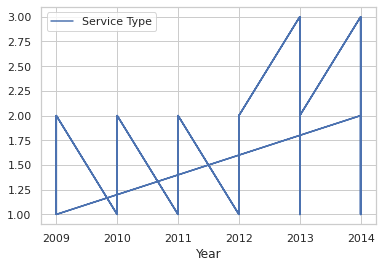

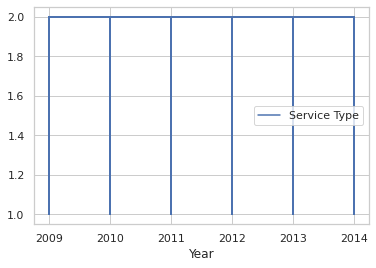

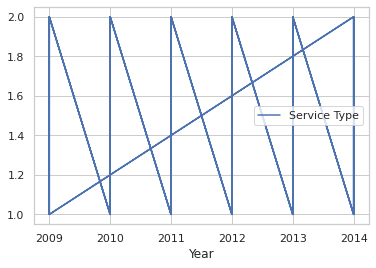

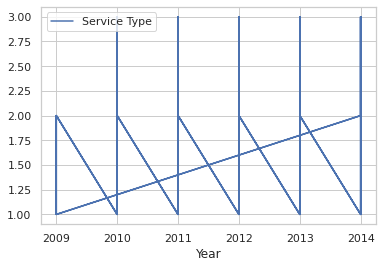

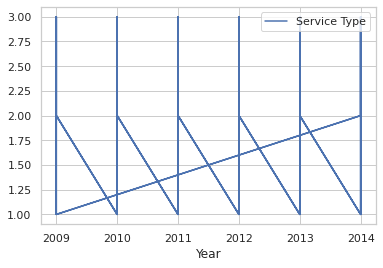

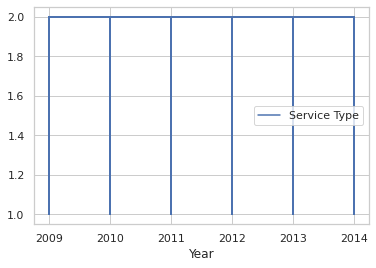

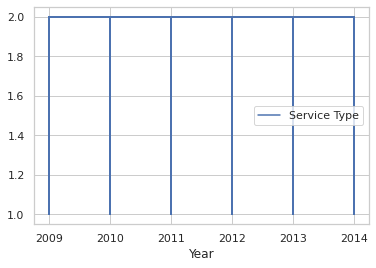

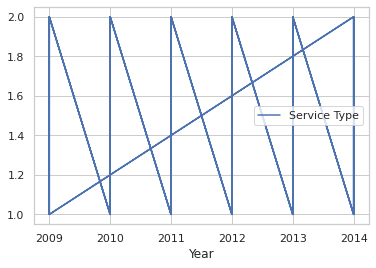

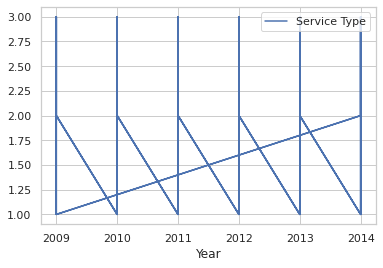

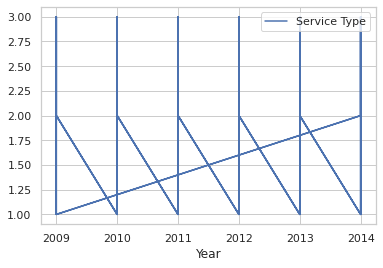

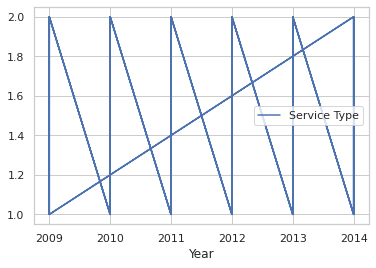

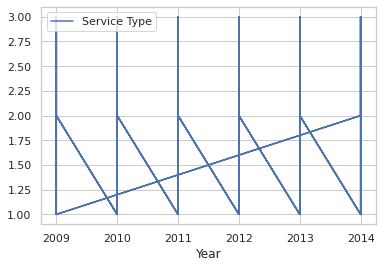

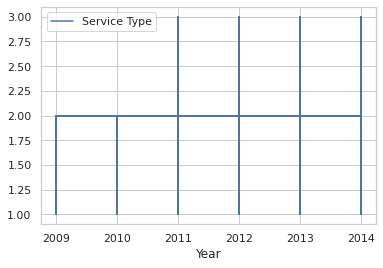

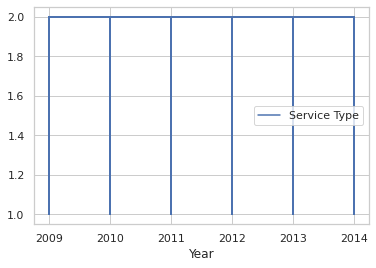

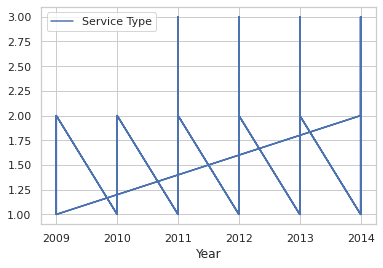

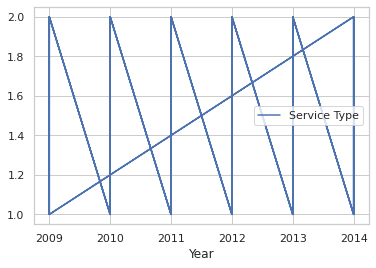

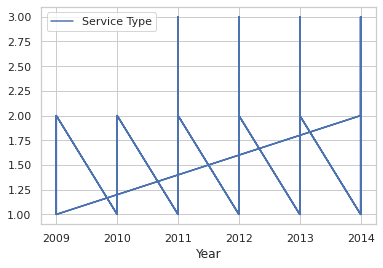

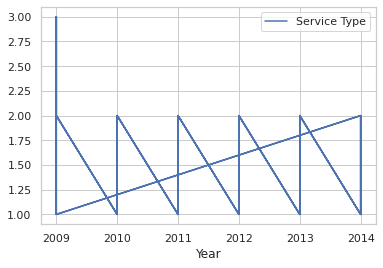

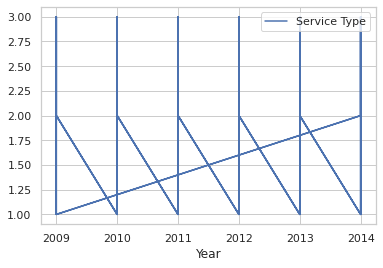

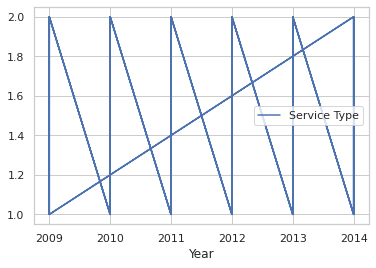

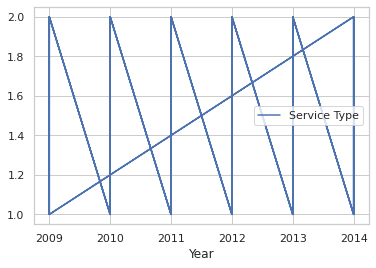

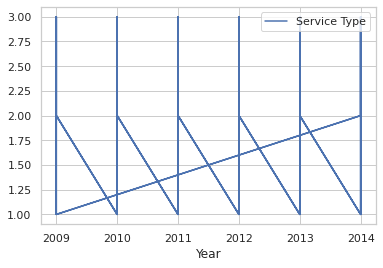

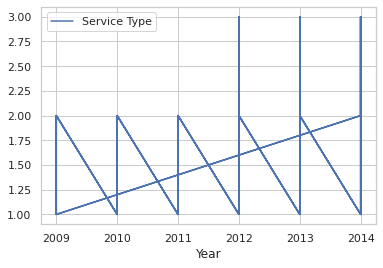

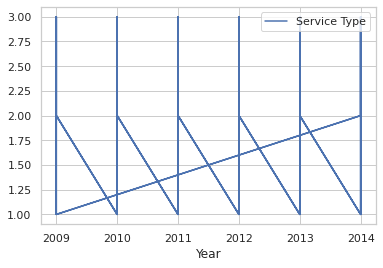

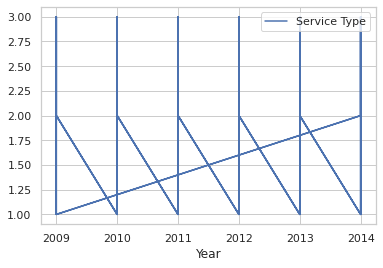

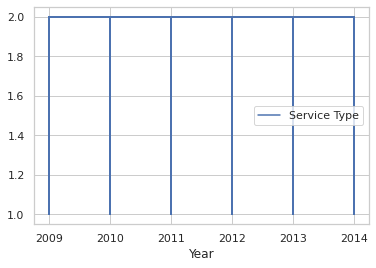

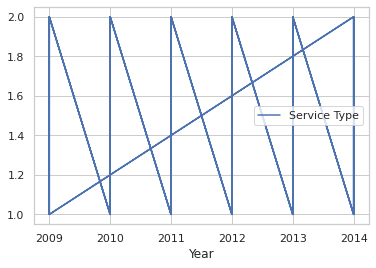

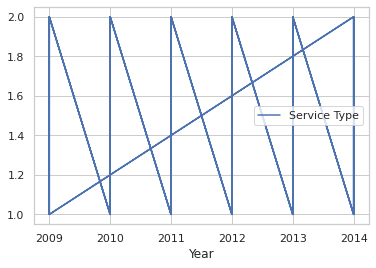

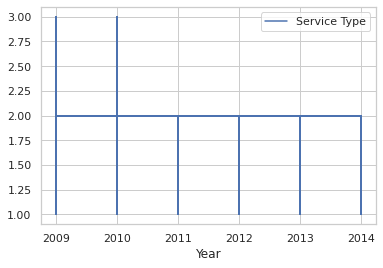

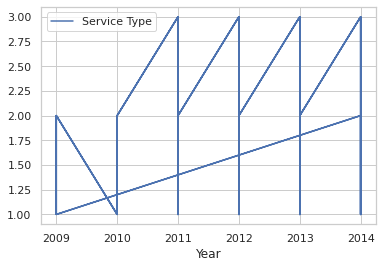

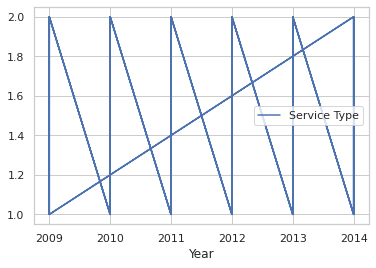

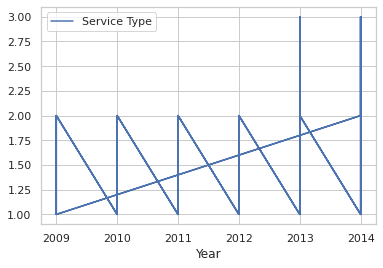

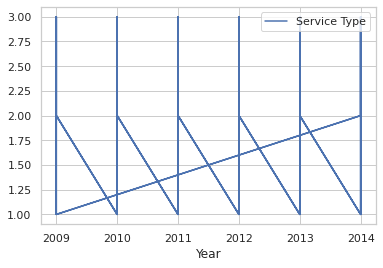

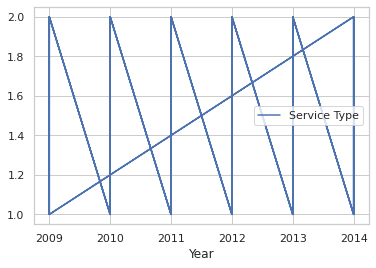

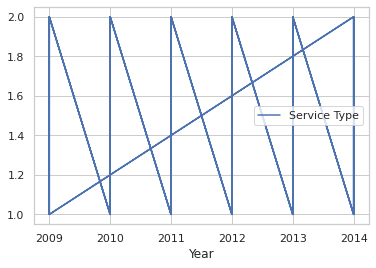

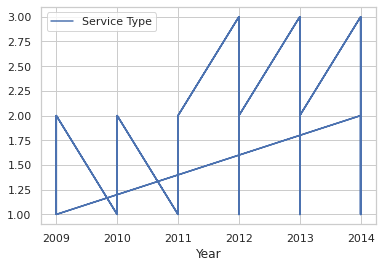

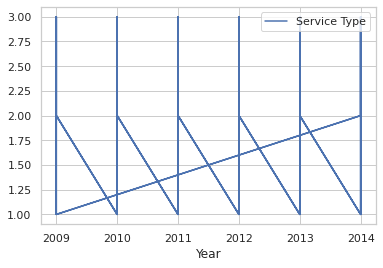

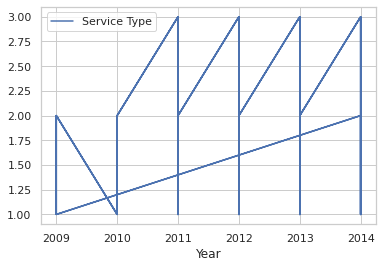

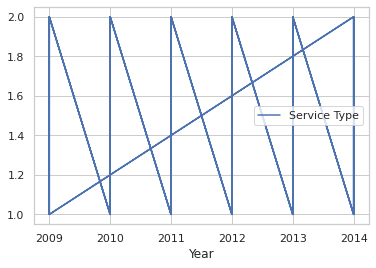

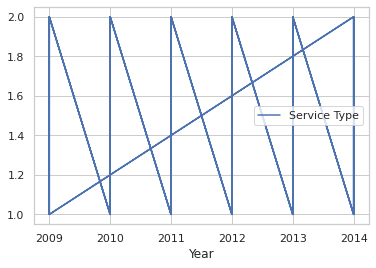

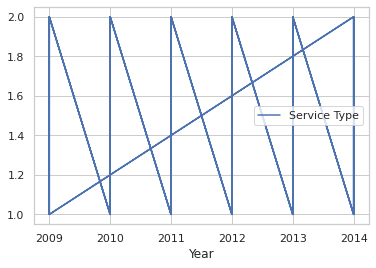

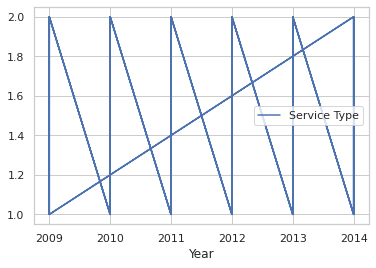

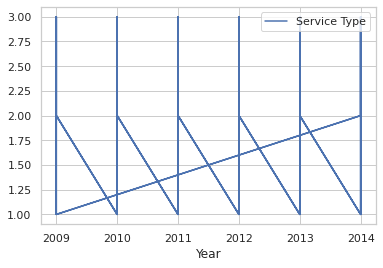

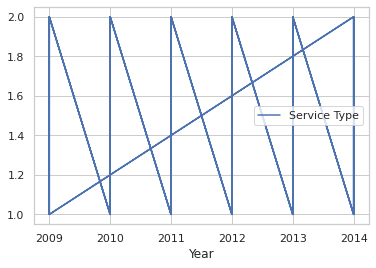

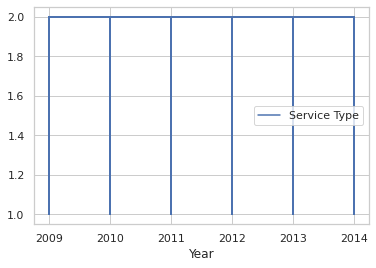

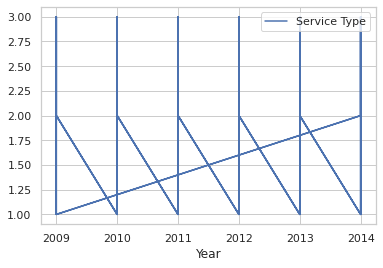

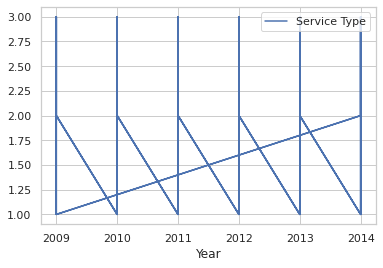

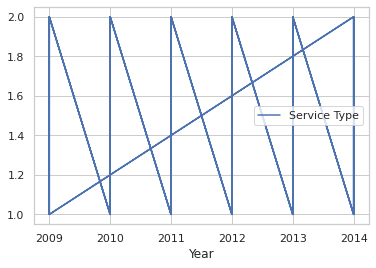

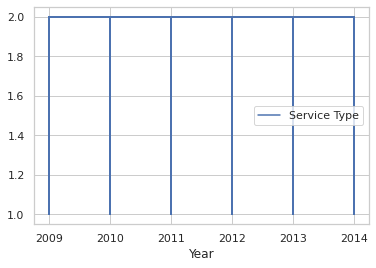

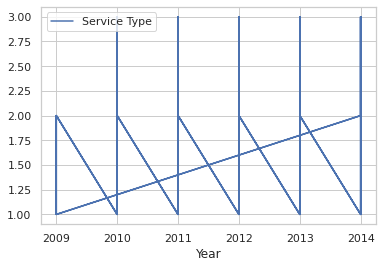

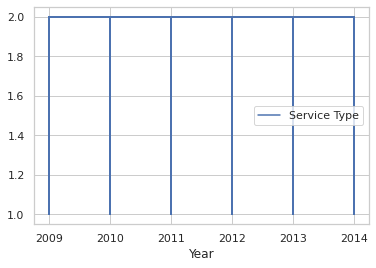

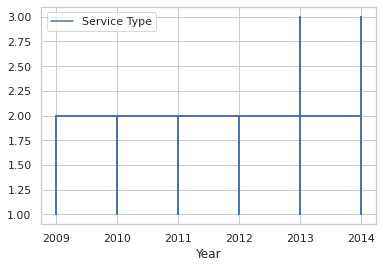

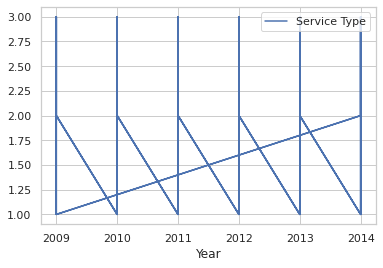

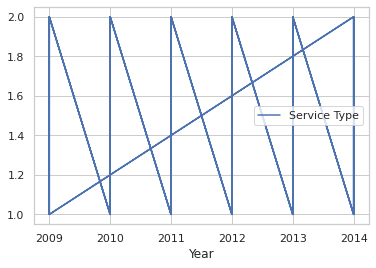

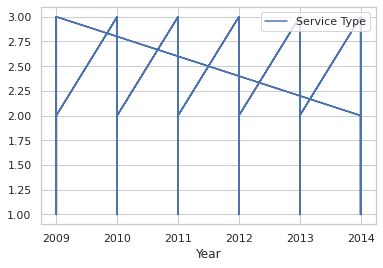

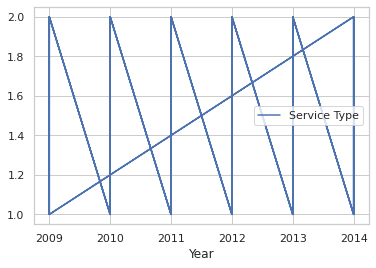

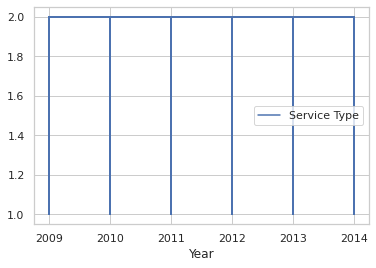

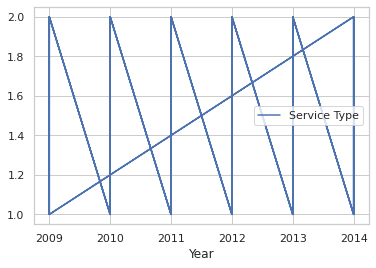

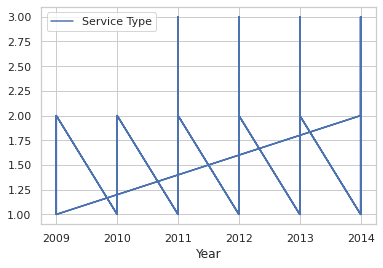

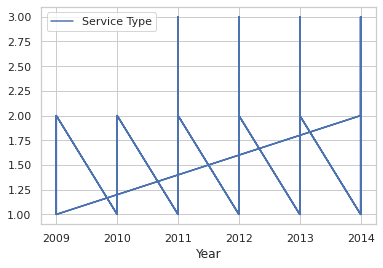

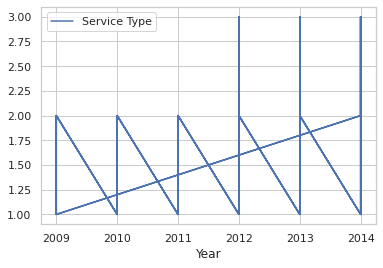

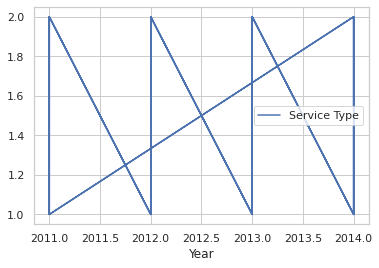

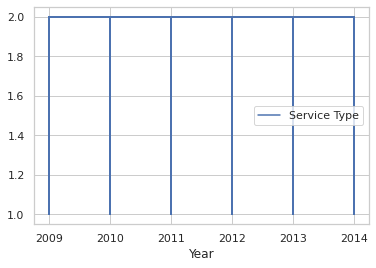

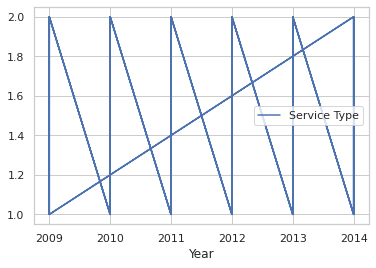

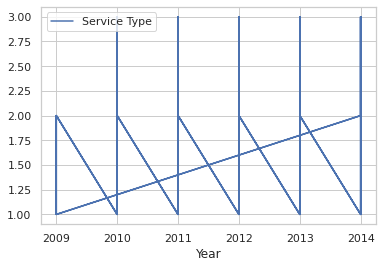

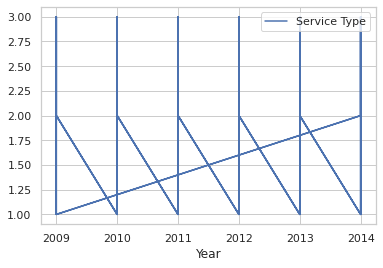

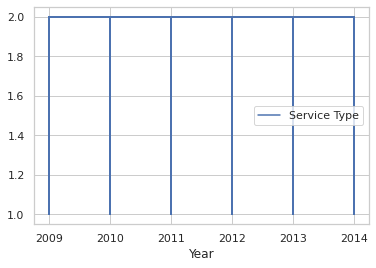

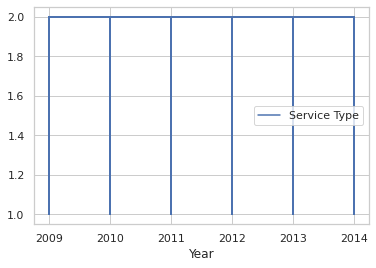

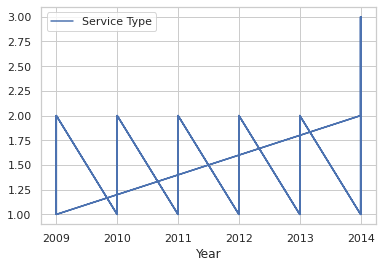

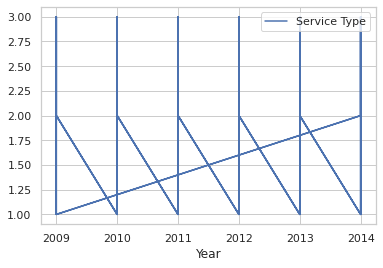

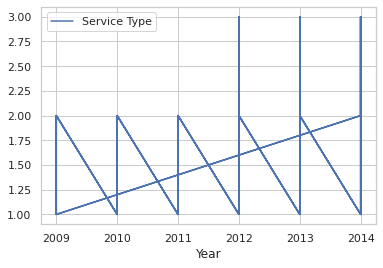

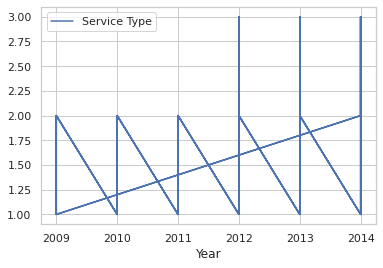

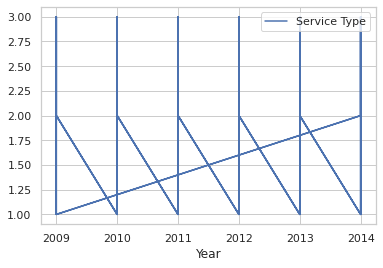

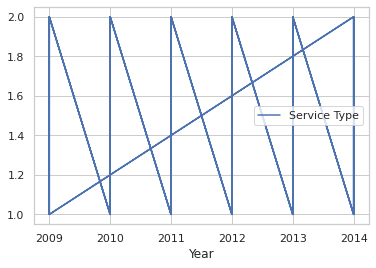

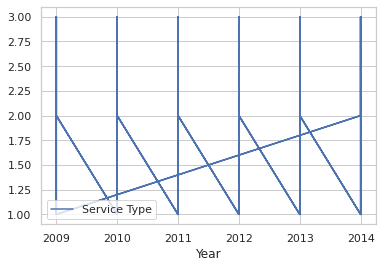

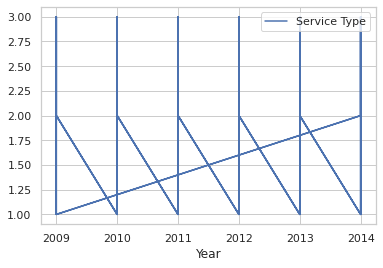

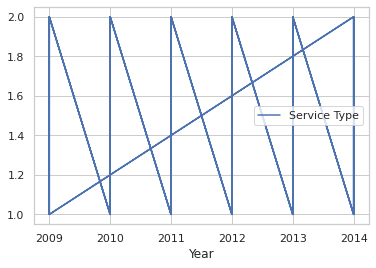

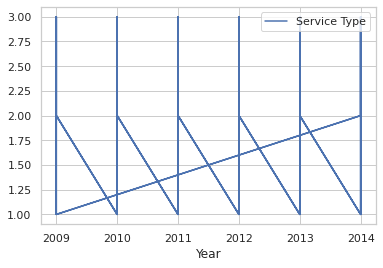

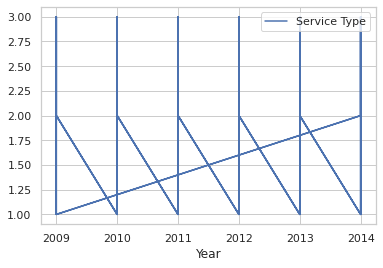

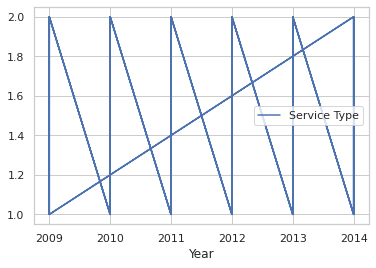

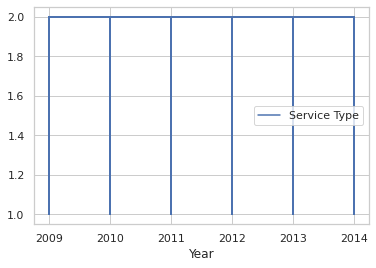

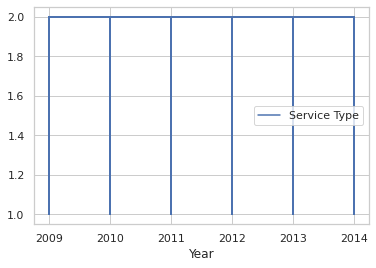

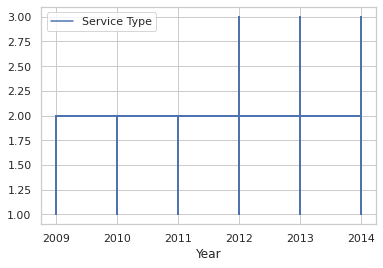

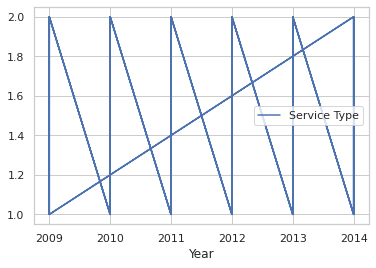

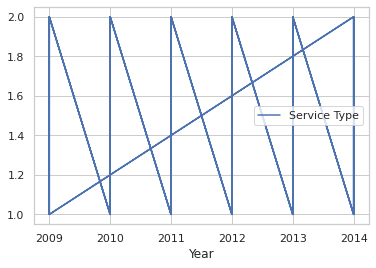

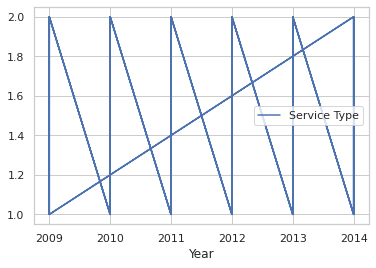

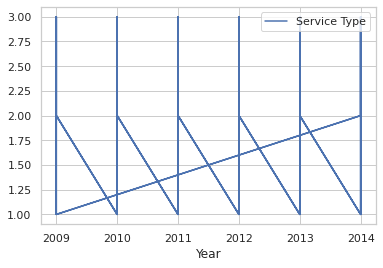

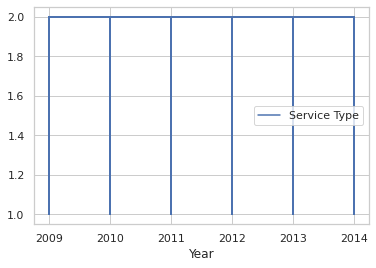

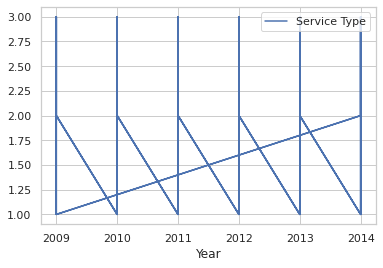

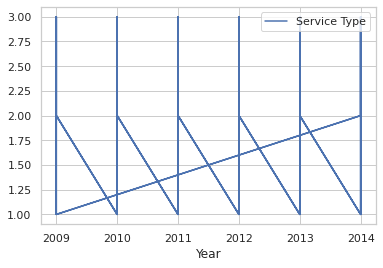

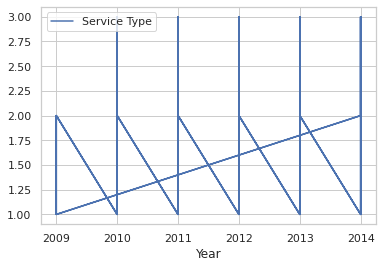

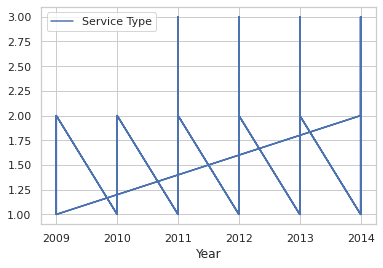

In [66]:
df.groupby('Country').plot(x='Year', y='Service Type')

In [67]:
df['Service Type'] = df['Service Type'].map({1:'Sanitation', 2:'Drinking water', 3:'Hygiene'})

In [68]:
waterdf = df[df['Service Type'] == 'Drinking water']

In [69]:
waterdf.head()

Country         Sex  ...    Population    Service level
3   Afghanistan  Both sexes  ...  1.283133e+07   At least basic
4   Afghanistan  Both sexes  ...  8.187934e+06   At least basic
5   Afghanistan  Both sexes  ...  4.643395e+06   At least basic
15  Afghanistan  Both sexes  ...  1.368238e+06  Limited service
16  Afghanistan  Both sexes  ...  1.046536e+06  Limited service

[5 rows x 9 columns]

In [70]:
waterdf_total = waterdf[waterdf['Residence Type'] == 'total']

In [71]:
waterdf_total.head()

Country         Sex  ...    Population    Service level
3   Afghanistan  Both sexes  ...  1.283133e+07   At least basic
15  Afghanistan  Both sexes  ...  1.368238e+06  Limited service
24  Afghanistan  Both sexes  ...  5.052846e+06    Surface water
30  Afghanistan  Both sexes  ...  8.751917e+06       Unimproved
36  Afghanistan  Both sexes  ...  1.392816e+07   At least basic

[5 rows x 9 columns]

In [72]:
waterdf_total = waterdf_total.drop(['Population', 'Residence Type', 'Service Type'], axis =1)
waterdf_total.head()

Country         Sex  Mortality Rate  Year  Coverage    Service level
3   Afghanistan  Both sexes           13.92  2009  45.81909   At least basic
15  Afghanistan  Both sexes           13.92  2009   4.88581  Limited service
24  Afghanistan  Both sexes           13.92  2009  18.04309    Surface water
30  Afghanistan  Both sexes           13.92  2009  31.25202       Unimproved
36  Afghanistan  Both sexes           13.92  2010  48.35636   At least basic

In [73]:
waterdf_spread = pd.pivot_table(waterdf_total, values = 'Coverage', index=['Country','Year'], columns = 'Service level').reset_index()
waterdf_spread.head()

Service level      Country  Year  ...  Surface water  Unimproved
0              Afghanistan  2009  ...       18.04309    31.25202
1              Afghanistan  2010  ...       17.14339    29.71756
2              Afghanistan  2011  ...       16.24475    28.17984
3              Afghanistan  2012  ...       15.34736    26.63900
4              Afghanistan  2013  ...       14.45124    25.09501

[5 rows x 8 columns]

In [74]:
waterdf_spread.loc[waterdf_spread['Basic service'].isnull(), 'Basic service'] = waterdf_spread['At least basic']
waterdf_spread = waterdf_spread.drop(['At least basic'], axis = 1)
waterdf=waterdf_spread
waterdf.head()

Service level      Country  Year  ...  Surface water  Unimproved
0              Afghanistan  2009  ...       18.04309    31.25202
1              Afghanistan  2010  ...       17.14339    29.71756
2              Afghanistan  2011  ...       16.24475    28.17984
3              Afghanistan  2012  ...       15.34736    26.63900
4              Afghanistan  2013  ...       14.45124    25.09501

[5 rows x 7 columns]

In [75]:
waterdf['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatema

In [76]:
waterdf.to_csv("/content/WASH_Final.csv")

In [77]:
df_afg = waterdf[waterdf['Country'] == 'Afghanistan']
df_alb = waterdf[waterdf['Country'] == 'Albania']
df_alg = waterdf[waterdf['Country'] == 'Algeria']
df_ang = waterdf[waterdf['Country'] == 'Angola']
df_yem = waterdf[waterdf['Country'] == 'Yemen']
df_zim = waterdf[waterdf['Country'] == 'Zimbabwe']

In [78]:
df_afg.head()

Service level      Country  Year  ...  Surface water  Unimproved
0              Afghanistan  2009  ...       18.04309    31.25202
1              Afghanistan  2010  ...       17.14339    29.71756
2              Afghanistan  2011  ...       16.24475    28.17984
3              Afghanistan  2012  ...       15.34736    26.63900
4              Afghanistan  2013  ...       14.45124    25.09501

[5 rows x 7 columns]

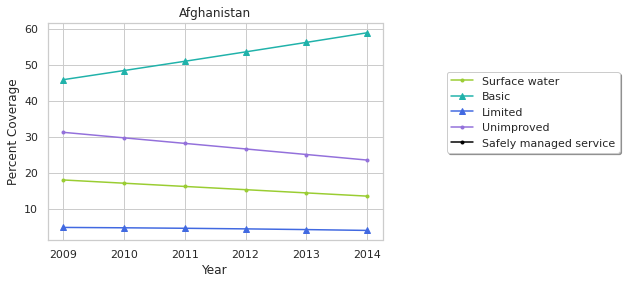

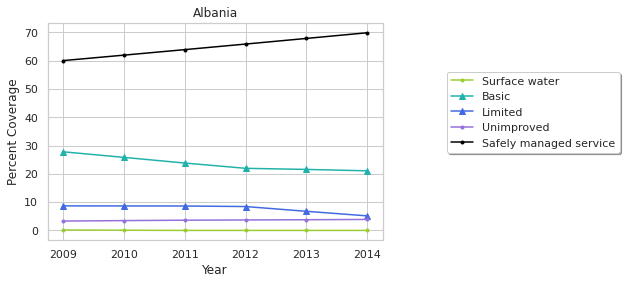

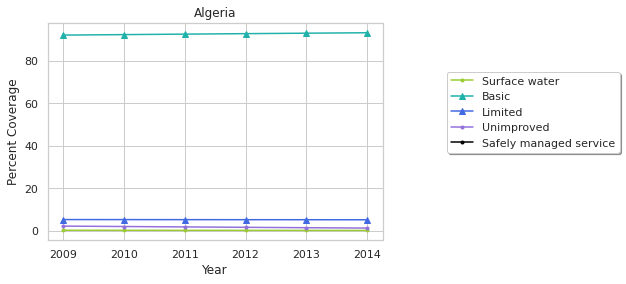

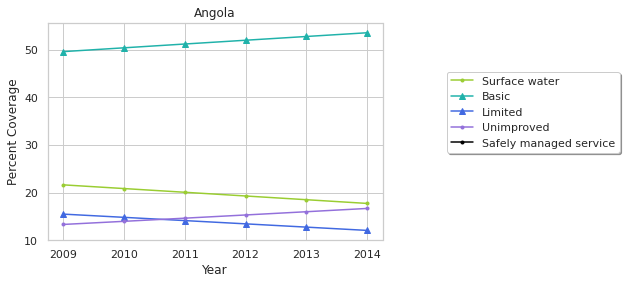

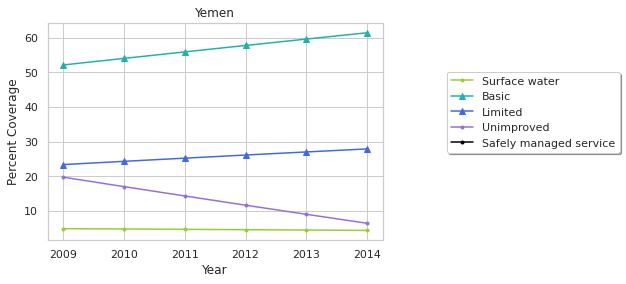

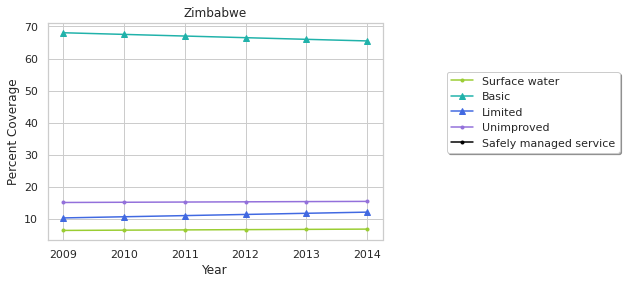

In [79]:
from matplotlib import pyplot
sdg_countries = [df_afg, df_alb, df_alg, df_ang, df_yem, df_zim]
sdg_country_title = ['Afghanistan', 
                   'Albania',
                   'Algeria', 
                   'Angola', 
                   'Yemen', 
                   'Zimbabwe']
index = 0
for country in sdg_countries: 
        title = sdg_country_title[index]
        
        plt.plot(country['Year'], country['Surface water'], fillstyle = 'full', color = 'yellowgreen', marker = '.', label = "Surface water")
        plt.plot(country['Year'], country['Basic service'], fillstyle = 'full',color = 'lightseagreen', marker = '^', label = "Basic")
        plt.plot(country['Year'], country['Limited service'], fillstyle = 'full',color = 'royalblue', marker = '^', label = 'Limited')
        plt.plot(country['Year'], country['Unimproved'],fillstyle = 'full', color = 'mediumpurple', marker ='.', label = 'Unimproved')
        plt.plot(country['Year'], country['Safely managed service'], fillstyle = 'full',color = 'black', marker = '.', label = "Safely managed service")
        
        plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
        plt.xticks(range(2009,2015))
        plt.xlabel('Year')
        plt.ylabel('Percent Coverage')
        plt.title(title)
        plt.show()
        
        image_title =  'Plot of Water Service Levels Across the world'
        
        index += 1

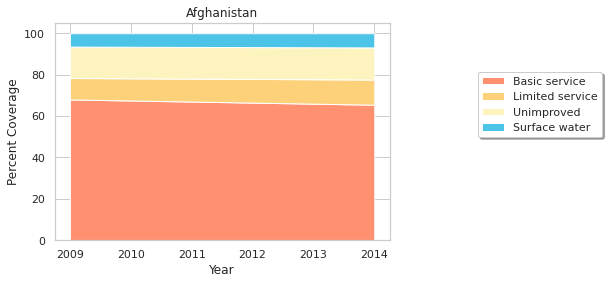

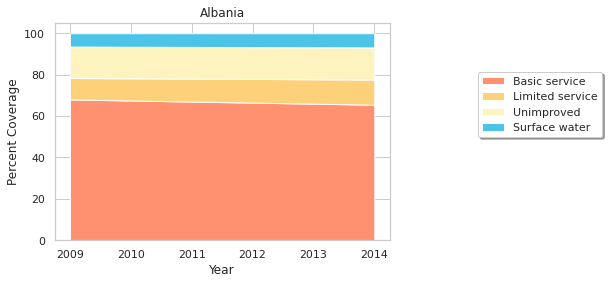

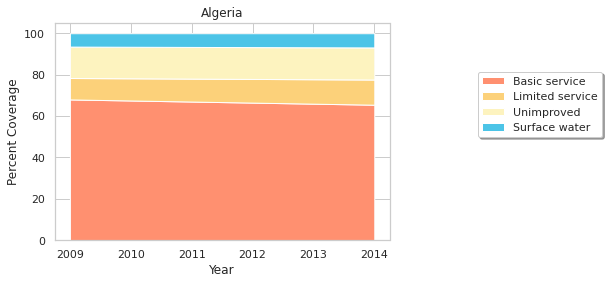

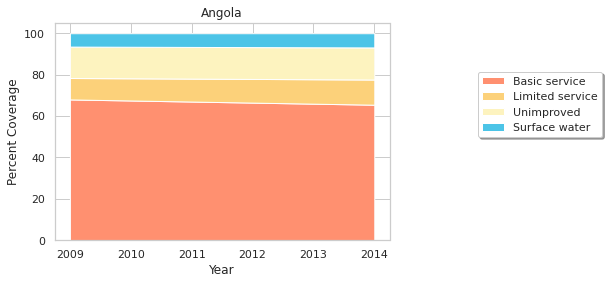

In [80]:
from matplotlib import pyplot
sdg_countries = [df_afg, df_alb, df_alg, df_ang]
sdg_country_title = ['Afghanistan', 
                    'Albania', 
                    'Algeria',
                    'Angola']
index = 0
for region in sdg_countries: 
    title = sdg_country_title[index]
    x = country['Year']
    y2 = country['Basic service']
    y3 = country['Limited service']
    y4 = country['Unimproved']
    y5 = country['Surface water']
    colors=['#FF9070','#FCD17A','#FDF3BF', '#4CC4E7','#4D8CBF']
        
    y = np.vstack([y2,y3,y4,y5])

    labels = ["Basic service", "Limited service", "Unimproved", "Surface water"]
    fig, ax = plt.subplots()
    ax.stackplot(x,y2,y3,y4,y5, labels=labels, colors=colors)
    plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    plt.xticks(range(2009,2015))
    plt.xlabel('Year')
    plt.ylabel('Percent Coverage')
    plt.title(title)
    plt.show()
    index += 1

Text(0.5, 0, 'Year')

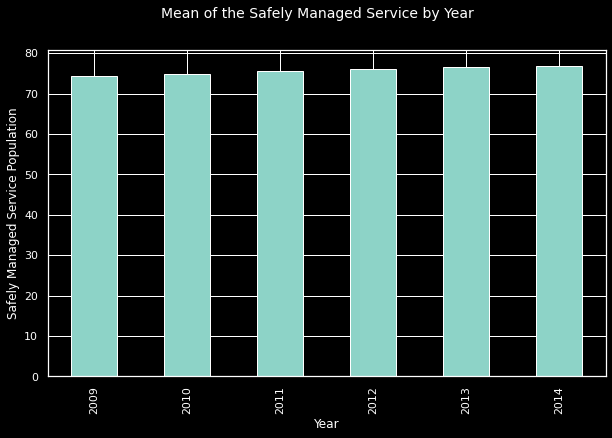

In [81]:
# Plotting bar plot of mean of the safely managed service by year
plt.style.use('dark_background')

waterdf.groupby('Year')['Safely managed service'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Mean of the Safely Managed Service by Year', fontsize=14)
plt.ylabel('Safely Managed Service Population')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

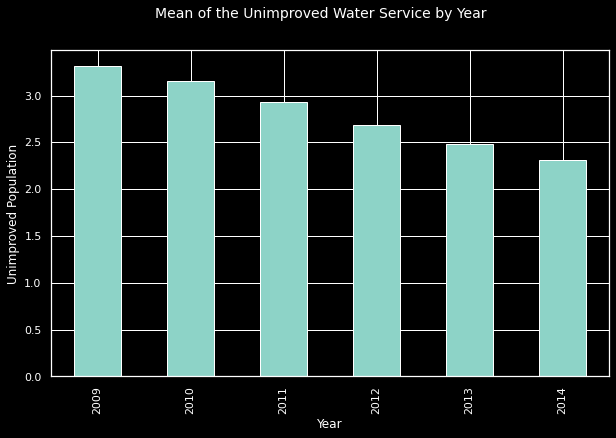

In [82]:
# Plotting bar plot of mean of the unimproved water service by year
waterdf.groupby('Year')['Unimproved'].median().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Mean of the Unimproved Water Service by Year', fontsize=14)
plt.ylabel('Unimproved Population')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

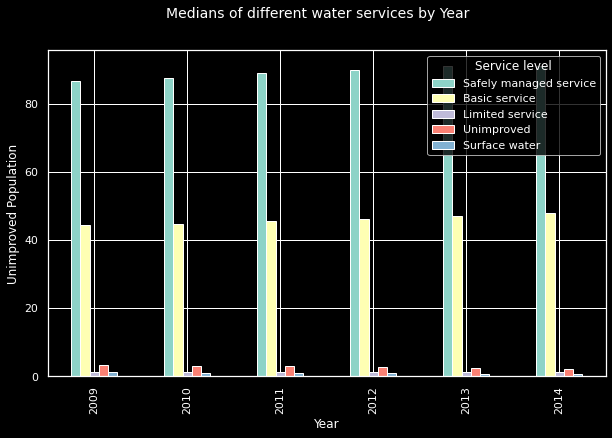

In [83]:
# Plotting bar plot of medians of different water services by year
waterdf.groupby('Year')['Safely managed service', 'Basic service', 'Limited service','Unimproved', 'Surface water'].median().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Medians of different water services by Year', fontsize=14)
plt.ylabel('Unimproved Population')
plt.xlabel('Year')